# Introdução Geral

Para facilitar a análise e garantir uma apresentação coesa, reunimos todas as perguntas de pesquisa em um único notebook. Isso nos permitirá abordar as questões de forma integrada, criando uma narrativa que contextualiza o problema, sua relevância para a sociedade e o impacto esperado dos resultados.

## Por que estamos tratando deste problema?

A prática de exercícios físicos é amplamente reconhecida como um fator essencial para a saúde e o bem-estar. No entanto, a forma como indivíduos escolhem suas rotinas de treino, influenciadas por fatores demográficos e fisiológicos, ainda é pouco explorada. Entender essas escolhas pode auxiliar academias, profissionais de saúde e empresas de tecnologia a oferecer programas mais personalizados e eficientes, promovendo melhores resultados para os praticantes.

## Relevância para a sociedade

Em um mundo cada vez mais preocupado com a saúde e o desempenho físico, compreender padrões de exercício pode trazer diversos benefícios, como:
- **Aprimorar programas de treino personalizados**, aumentando a adesão dos praticantes.
- **Promover saúde e qualidade de vida**, ao incentivar práticas adequadas ao perfil de cada pessoa.
- **Gerar insights para academias e startups de fitness**, ajudando a atender melhor seus clientes.

Dessa forma, este projeto busca explorar essas questões para oferecer insights valiosos que contribuam para a sociedade.

## Perguntas que queremos responder

As perguntas de pesquisa que nortearão nossa análise são:

1. **Qual tipo de exercício é mais eficaz em queimar calorias: aeróbico ou anaeróbico?**
2. **O IMC influencia a escolha do tipo de treino?**
3. **A frequência semanal de treinos está associada a um maior número de calorias queimadas por sessão?**

## Metodologia

Para responder a essas perguntas, adotaremos a seguinte abordagem:

1. **Pré-processamento de Dados**:
   - Limpeza dos dados, tratamento de valores ausentes e padronização das colunas.

2. **Análise Exploratória de Dados (EDA)**:
   - Visualizações iniciais e análises descritivas para entender distribuições, correlações e tendências.

3. **Análises Específicas**:
   - **Eficácia dos exercícios**: Comparação entre calorias queimadas em exercícios aeróbicos e anaeróbicos, utilizando estatísticas descritivas, visualizações e testes de hipótese.
   - **Influência do IMC**: Avaliação da relação entre o Índice de Massa Corporal (IMC) e a escolha do tipo de treino.
   - **Associação entre frequência e calorias queimadas**: Análise de correlação ou regressão para avaliar a relação entre a frequência semanal e a média de calorias queimadas por sessão.

4. **Documentação e Visualização**:
   - Criação de gráficos e tabelas para interpretação dos dados e preparação de um relatório final com as conclusões.

## Conclusões Esperadas

Esperamos identificar:
- Quais tipos de exercícios são mais eficazes para queima de calorias.
- Se há uma relação entre o IMC e a escolha do tipo de treino.
- Se a frequência semanal de treinos impacta a quantidade de calorias queimadas por sessão.

Com essas respostas, esperamos fornecer insights práticos para a personalização de rotinas de treino, beneficiando tanto os praticantes quanto as academias.

## Tabela de Conteúdo

1. **[Introdução Geral](#introducao-geral)**  
2. **[Instalação de Requisitos e Carregamento dos Dados](#instalacao-de-requisitos-e-carregamento-dos-dados)**  
3. **[Analise Exploratoria de Dados](#analise-exploratoria-de-dados)**  
4. **[Qual tipo de exercício é mais eficaz em queimar calorias?](#qual-tipo-de-exercicio-e-mais-eficaz-em-queimar-calorias)**  
5. **[O IMC influencia a escolha do tipo de treino?](#o-imc-influencia-a-escolha-do-tipo-de-treino)**  
6. **[A frequência semanal de treinos está associada a um maior número de calorias queimadas?](#a-frequencia-semanal-de-treinos-esta-associada-a-um-maior-numero-de-calorias-queimadas)**  
7. **[Conclusões Finais](#conclusoes-finais)**  


# Instalação de Requisitos e Carregamento dos Dados

### Install Requirements.txt

In [54]:
!pip install -r ../../requirements.txt

### Import

In [55]:
# Import necessary libraries
import pandas as pd
import numpy as np
from plotnine import *
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.formula.api import ols
import statsmodels.api as sm

### Extração e Transformação do Dado

In [56]:
# Load the dataset
path = "../../data/gym_members_exercise_tracking.csv"
df_gym = pd.read_csv(path)

In [57]:
# Display the first few rows to understand the dataset structure
display(df_gym.head())

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39


In [58]:
df_gym.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    float64
 9   Workout_Type                   973 non-null    object 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/week)  973 non-null    int

In [59]:
# Create a boolean column to categorize workouts as aerobic or not based on Workout_Type.
df_gym["is_aerobic"] = df_gym["Workout_Type"].apply(lambda x: "Strength" not in x)

In [60]:
# Function to shuffle the 'is_aerobic' column
# This creates a randomized distribution for comparison or hypothesis testing.
def shuffle_is_aerobic(df):
    df_shuffle = df.copy(deep=True)
    is_aerobic = df_shuffle["is_aerobic"]
    is_aerobic_index = np.random.permutation(df_shuffle.index)
    df_shuffle["is_aerobic"] = is_aerobic[is_aerobic_index].values
    return df_shuffle

df_shuffle = shuffle_is_aerobic(df_gym)
display(df_shuffle.head())

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI,is_aerobic
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20,False
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00,False
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71,False
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41,True
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39,False


In [61]:
# Convert categorical columns to dummy variables
# This will allow us to include `Gender`, `Workout_Type`, and any other categorical columns in the correlation analysis.
df_encoded = pd.get_dummies(df_gym, columns=["Gender", "Workout_Type"], drop_first=True)

In [62]:
# Display the first few rows of the transformed dataset to confirm the encoding
display(df_encoded.head())

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI,is_aerobic,Gender_Male,Workout_Type_HIIT,Workout_Type_Strength,Workout_Type_Yoga
0,56,88.3,1.71,180,157,60,1.69,1313.0,12.6,3.5,4,3,30.20,True,True,False,False,True
1,46,74.9,1.53,179,151,66,1.30,883.0,33.9,2.1,4,2,32.00,True,False,True,False,False
2,32,68.1,1.66,167,122,54,1.11,677.0,33.4,2.3,4,2,24.71,True,False,False,False,False
3,25,53.2,1.70,190,164,56,0.59,532.0,28.8,2.1,3,1,18.41,False,True,False,True,False
4,38,46.1,1.79,188,158,68,0.64,556.0,29.2,2.8,3,1,14.39,False,True,False,True,False


# Analise Exploratoria de Dados

### 1. Verificando valores vazios

In [63]:
# Identifying any missing values helps to address gaps in the data before analysis.
missing_values = df_gym.isnull().sum()
print("Valores vazios por coluna:\n", missing_values)

Valores vazios por coluna:
 Age                              0
Gender                           0
Weight (kg)                      0
Height (m)                       0
Max_BPM                          0
Avg_BPM                          0
Resting_BPM                      0
Session_Duration (hours)         0
Calories_Burned                  0
Workout_Type                     0
Fat_Percentage                   0
Water_Intake (liters)            0
Workout_Frequency (days/week)    0
Experience_Level                 0
BMI                              0
is_aerobic                       0
dtype: int64


Podemos ver que não temos valores nulos em nenhuma coluna

### 2. Resumo Estatistico

In [64]:
# Provides basic statistics for numerical columns, showing distribution, mean, and standard deviation.
summary_stats = df_gym.describe().T
summary_stats

,count,mean,std,min,25%,50%,75%,max
Age,973.0,38.683453,12.180928,18.00,28.00,40.00,49.00,59.00
Weight (kg),973.0,73.854676,21.207500,40.00,58.10,70.00,86.00,129.90
Height (m),973.0,1.722580,0.127720,1.50,1.62,1.71,1.80,2.00
Max_BPM,973.0,179.883864,11.525686,160.00,170.00,180.00,190.00,199.00
Avg_BPM,973.0,143.766701,14.345101,120.00,131.00,143.00,156.00,169.00
Resting_BPM,973.0,62.223022,7.327060,50.00,56.00,62.00,68.00,74.00
Session_Duration (hours),973.0,1.256423,0.343033,0.50,1.04,1.26,1.46,2.00
Calories_Burned,973.0,905.422405,272.641516,303.00,720.00,893.00,1076.00,1783.00
Fat_Percentage,973.0,24.976773,6.259419,10.00,21.30,26.20,29.30,35.00
Water_Intake (liters),973.0,2.626619,0.600172,1.50,2.20,2.60,3.10,3.70


Esta tabela pode nos ajudara a entender a distrivuição e comportamento de cada uma das colunas

### 3. Distribuição de tipos de treino

In [65]:
# Displaying unique workout types to understand exercise variety.
workouts_distinct = df_gym["Workout_Type"].unique()
print("Diferentes tipos de treino: ", workouts_distinct)

Diferentes tipos de treino:  ['Yoga' 'HIIT' 'Cardio' 'Strength']


In [66]:
# Count the occurrences of each Workout_Type
workouts_count = df_gym.groupby("Workout_Type").size().reset_index(name="count")
print("Contagem dos tipos de treino:\n", workouts_count)

Contagem dos tipos de treino:
   Workout_Type  count
0       Cardio    255
1         HIIT    221
2     Strength    258
3         Yoga    239


C:\Users\raiss\AppData\Local\Temp\ipykernel_912\1226205782.py:13: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


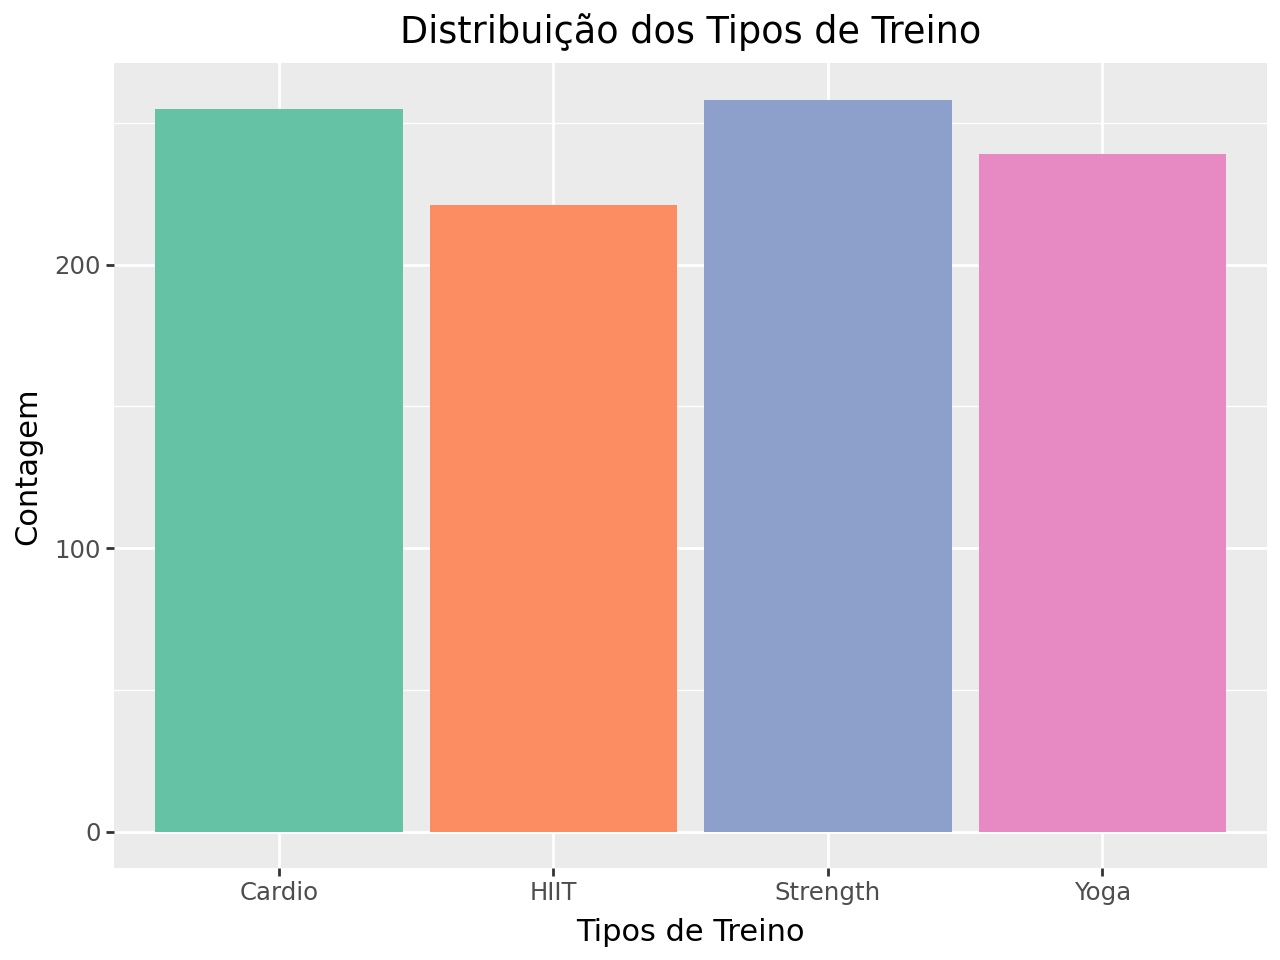

In [67]:
# Plot the distribution of Workout_Type with colors
plot_workout_type = (
    ggplot(df_gym, aes(x="Workout_Type", fill="Workout_Type"))  # Add fill aesthetic
    + geom_bar(show_legend=False)  # Add colors to the bars
    + labs(
        title="Distribuição dos Tipos de Treino",
        x="Tipos de Treino",
        y="Contagem"
    )
    + scale_fill_brewer(type="qual", palette="Set2")  # Use a qualitative color palette
)

print(plot_workout_type)


O gráfico mostra a **distribuição dos tipos de treino** realizados, destacando quatro categorias: **Cardio, HIIT, Strength** e **Yoga**. As barras indicam a contagem de sessões para cada tipo de treino.

- **Cardio** e **Strength** possuem a maior frequência, indicando que esses são os tipos de treino mais populares.
- **Yoga** e **HIIT** apresentam uma leve diferença, sendo **HIIT** o menos praticado entre os quatro.
- A distribuição geral sugere uma preferência equilibrada entre os treinos, sem grandes disparidades.

Esse padrão pode refletir uma diversidade de preferências entre os participantes ou estratégias de treino balanceadas no dataset analisado.

### 4. Analise de calorias gastas por tipo de treino

C:\Users\raiss\AppData\Local\Temp\ipykernel_912\1684351023.py:13: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


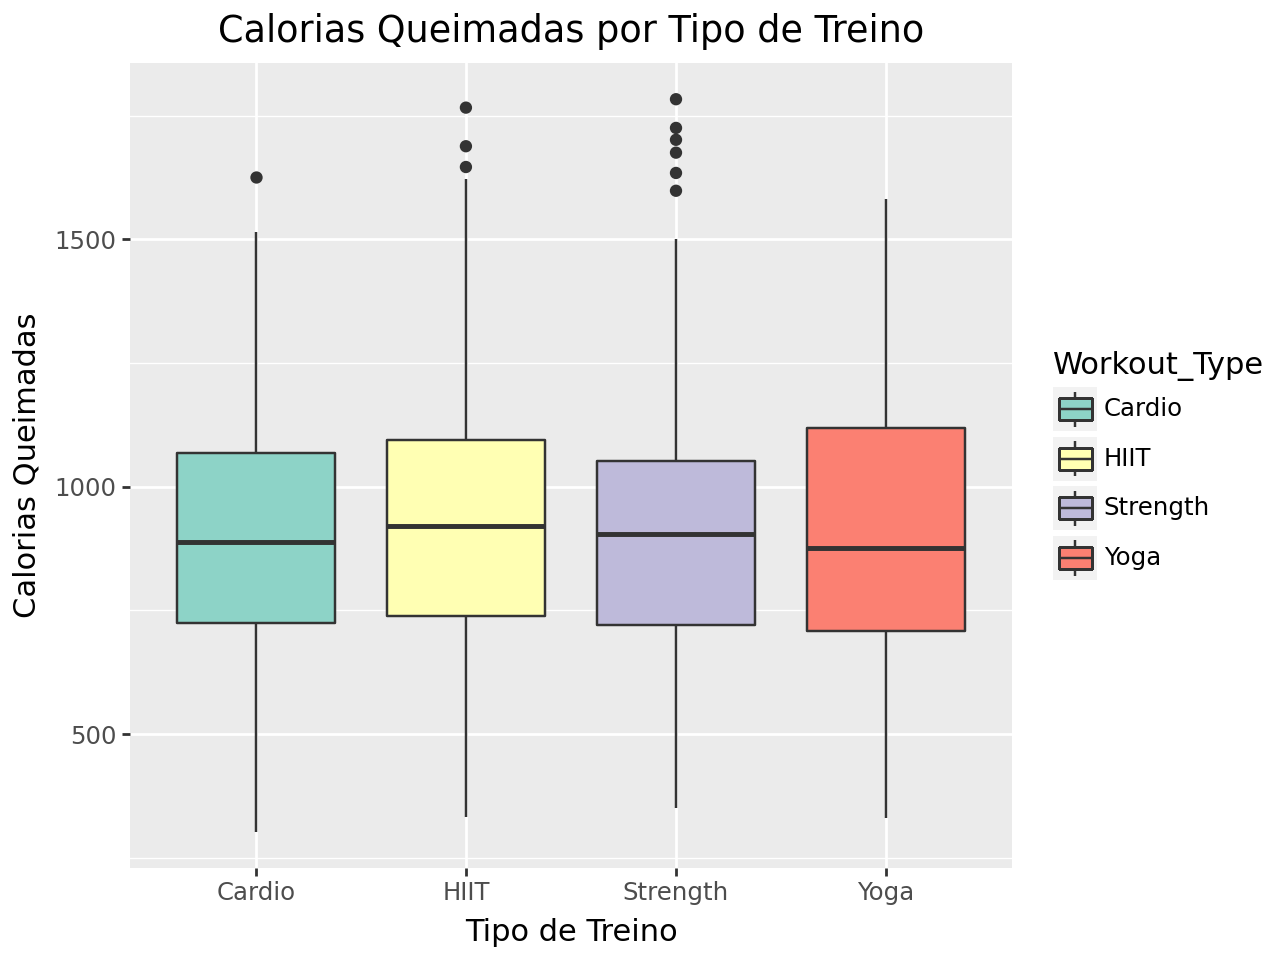

In [68]:
# Visualize the difference in calories burned across different workout types with colors
plot_calories_burned = (
    ggplot(df_gym, aes(x="Workout_Type", y="Calories_Burned", fill="Workout_Type"))  # Add fill aesthetic for colors
    + geom_boxplot()  # Use boxplot to show distribution
    + labs(
        title="Calorias Queimadas por Tipo de Treino", 
        x="Tipo de Treino",
        y="Calorias Queimadas" 
    )
    + scale_fill_brewer(type="qual", palette="Set3")  # Use a qualitative color palette
)

print(plot_calories_burned)


O gráfico apresenta um **boxplot** comparando as **calorias queimadas por tipo de treino** (Cardio, HIIT, Strength e Yoga). A análise revela:

- **Cardio, HIIT e Strength** possuem medianas semelhantes, indicando que esses treinos queimam calorias de forma consistente em média.
- **Yoga** apresenta a menor mediana, sugerindo que, em geral, queima menos calorias comparado aos outros treinos.
- A variabilidade (representada pelos comprimentos dos boxes e whiskers) é maior em **Strength** e **Yoga**, sugerindo que o gasto calórico nesses treinos pode variar mais significativamente entre os indivíduos.
- Há **outliers** especialmente nos treinos **Cardio e HIIT**, indicando que algumas sessões resultaram em gasto calórico muito acima do normal.

Esses padrões sugerem que a escolha do treino influencia o gasto calórico e que Yoga, apesar de ser menos intenso, ainda apresenta variações dependendo da prática individual.

### 5. Distribuição do IMC e o relacionamento disso com o tipo de treino

C:\Users\raiss\AppData\Local\Temp\ipykernel_912\1812943724.py:13: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


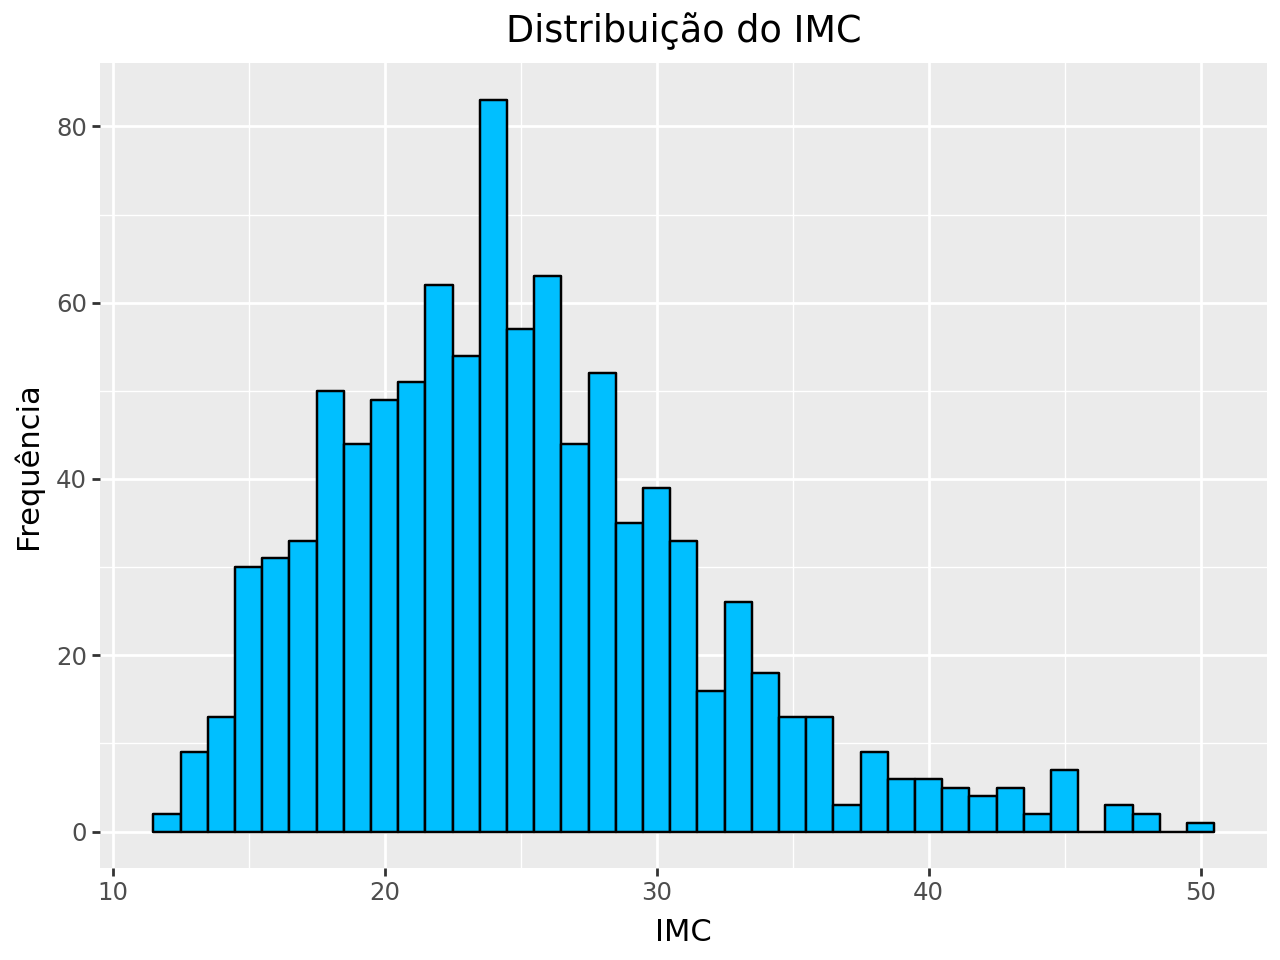

In [69]:
# Check BMI distribution and examine if BMI varies with workout type
plot_bmi_distribution = (
    ggplot(df_gym, aes(x="BMI")) 
    + geom_histogram(binwidth=1, fill="deepskyblue", color="black")  # Adjust fill color for better visibility
    + labs(
        title="Distribuição do IMC", 
        x="IMC",  
        y="Frequência"  
    )
    + theme()  # Optional: Customize theme if necessary
)

print(plot_bmi_distribution)


O gráfico apresenta a **distribuição do IMC (Índice de Massa Corporal)** dos participantes. A análise sugere:

- A distribuição é **assimétrica à direita**, com a maioria dos indivíduos concentrados entre **18 e 30 de IMC**, faixa considerada normal ou sobrepeso, segundo os critérios da OMS.
- O pico da distribuição ocorre próximo ao IMC de **24**, indicando que essa é a faixa mais comum entre os participantes.
- Há uma cauda longa à direita, indicando a presença de indivíduos com **IMC elevado** (obesidade).
- Na faixa abaixo de **18**, há menos participantes, representando indivíduos com **baixo peso**.

Esse padrão é esperado em populações gerais e pode refletir uma predominância de participantes com peso considerado saudável ou levemente acima do ideal.

C:\Users\raiss\AppData\Local\Temp\ipykernel_912\2454195463.py:13: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


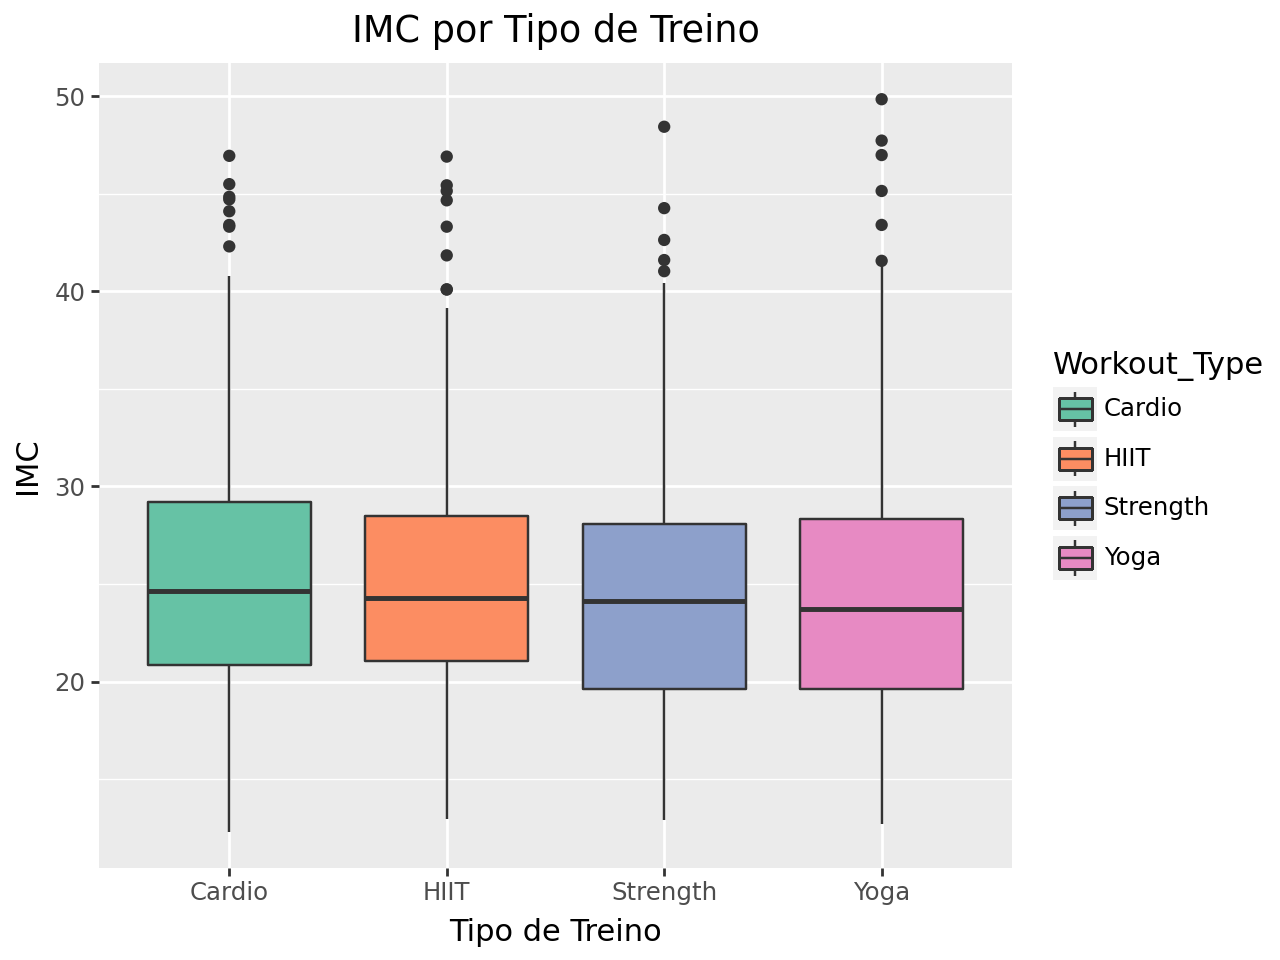

In [70]:
# Visualize BMI distribution by workout type with colors
plot_bmi_workout_type = (
    ggplot(df_gym, aes(x="Workout_Type", y="BMI", fill="Workout_Type"))  # Add fill aesthetic for colors
    + geom_boxplot()  # Use boxplot to show BMI variation across workout types
    + labs(
        title="IMC por Tipo de Treino",  
        x="Tipo de Treino",  
        y="IMC"  
    )
    + scale_fill_brewer(type="qual", palette="Set2")  # Use a qualitative palette for workout types
)

print(plot_bmi_workout_type)


O gráfico de **boxplot** compara os valores de **IMC (Índice de Massa Corporal)** em relação aos diferentes **tipos de treino** (Cardio, HIIT, Strength e Yoga). A análise aponta:

- A **mediana do IMC** é semelhante entre os grupos, com valores próximos a **25**, indicando que a maioria dos participantes está na faixa de peso normal ou sobrepeso.
- A distribuição de **Cardio** e **Yoga** apresenta maior variabilidade, com whiskers mais longos e presença de outliers, sugerindo uma diversidade maior de perfis físicos entre os praticantes desses treinos.
- O treino **HIIT** apresenta menor dispersão, sugerindo que os participantes têm IMCs mais consistentes.
- Todos os tipos de treino têm outliers para IMCs elevados, indicando a presença de indivíduos com obesidade participando de todas as modalidades.

Essa distribuição pode refletir que os diferentes tipos de treino atraem públicos variados em termos de composição corporal, mas com uma concentração geral próxima ao IMC mediano.

### 6. Frequência dos treinos e Calorias gastas

C:\Users\raiss\AppData\Local\Temp\ipykernel_912\1601801864.py:14: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


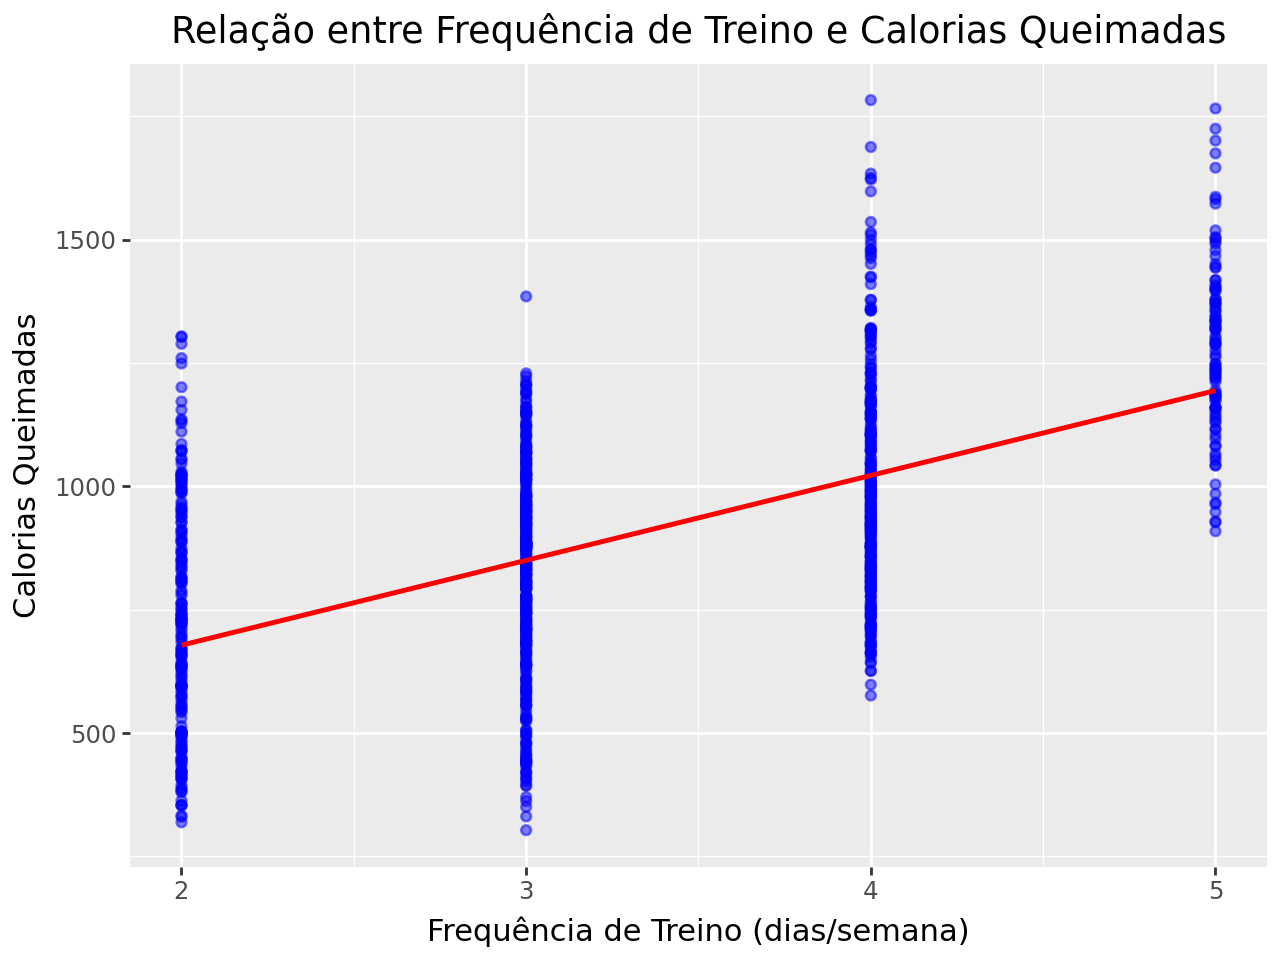

In [71]:
# Analyze if workout frequency is associated with calories burned per session
plot_frequency_calories = (
    ggplot(df_gym, aes(x="Workout_Frequency (days/week)", y="Calories_Burned")) 
    + geom_point(alpha=0.5, color="blue")  # Add points with semi-transparency for better visibility
    + geom_smooth(method="lm", se=False, color="red")  # Add regression line in red
    + labs(
        title="Relação entre Frequência de Treino e Calorias Queimadas", 
        x="Frequência de Treino (dias/semana)", 
        y="Calorias Queimadas" 
    )
    + theme()  # Optional: Customize the theme
)

print(plot_frequency_calories)


O gráfico de dispersão mostra a **relação entre a frequência de treino (dias/semana)** e as **calorias queimadas** por sessão, com uma linha de tendência ajustada.

- Há uma **correlação positiva**: conforme a frequência de treino aumenta, o número de calorias queimadas tende a ser maior.
- A linha de tendência (em vermelho) sugere que, em média, participantes que treinam mais dias por semana queimam mais calorias.
- Apesar da tendência positiva, observa-se uma grande **variabilidade** nos valores de calorias queimadas, com registros dispersos em todas as frequências, indicando que outros fatores (como duração e intensidade do treino) também influenciam o gasto calórico.
- Outliers estão presentes, principalmente em frequências mais baixas, onde algumas sessões resultaram em alto gasto calórico.

O gráfico sugere que treinar com maior frequência está associado a um maior gasto calórico médio, mas a variabilidade reforça que outros elementos devem ser considerados na análise.

### 7. Analise de BPM (Batimentos por Minutos) por tipo de treino

C:\Users\raiss\AppData\Local\Temp\ipykernel_912\1291839217.py:13: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


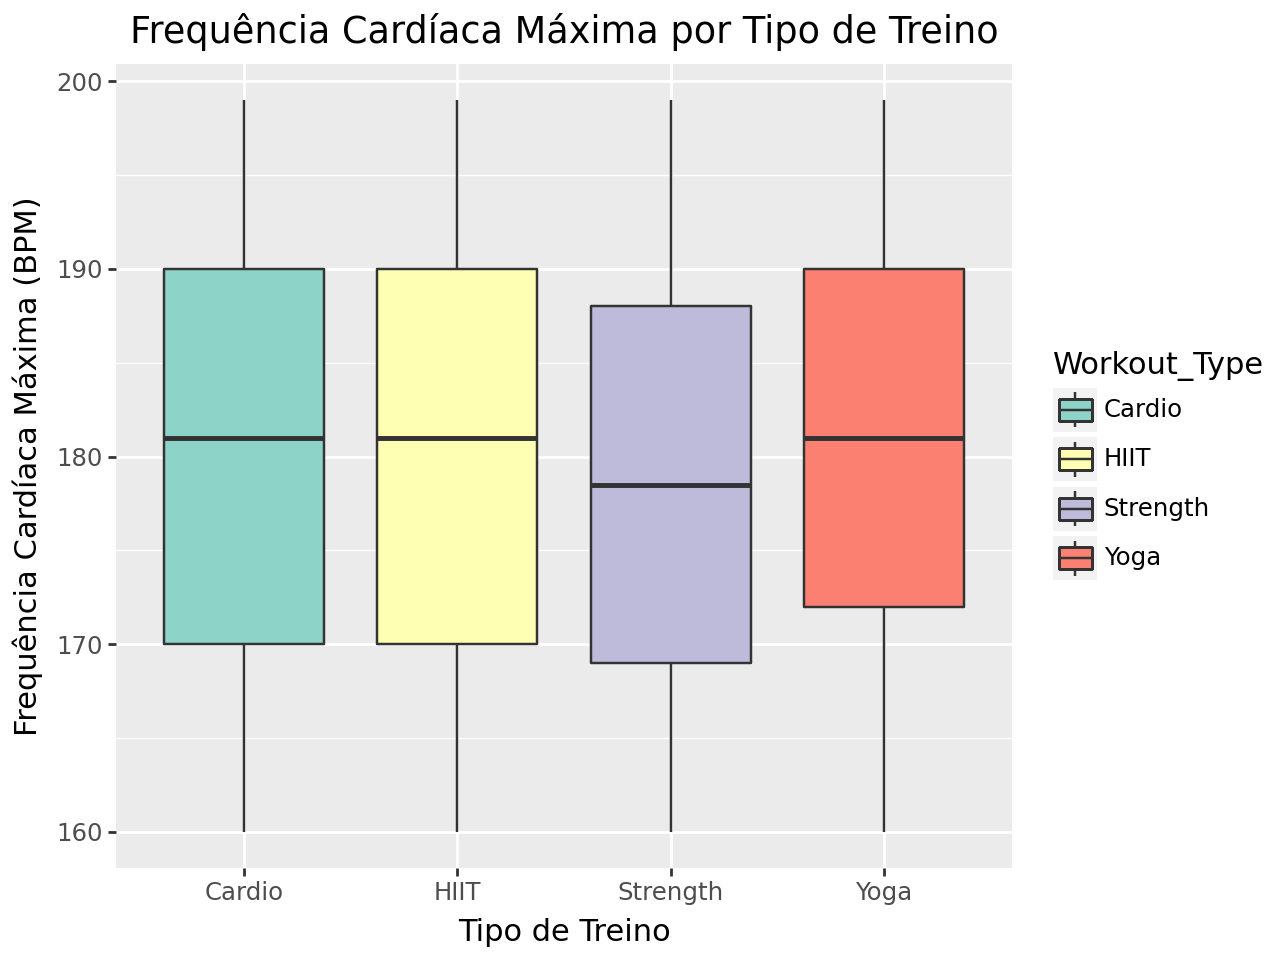

In [72]:
# Explore max BPM to gauge workout intensity
plot_max_bpm = (
    ggplot(df_gym, aes(x="Workout_Type", y="Max_BPM", fill="Workout_Type"))  # Add fill aesthetic for colors
    + geom_boxplot()  # Display max BPM distribution by workout type
    + labs(
        title="Frequência Cardíaca Máxima por Tipo de Treino",
        x="Tipo de Treino",
        y="Frequência Cardíaca Máxima (BPM)"
    )
    + scale_fill_brewer(type="qual", palette="Set3")  # Use qualitative color palette for workout types
)

print(plot_max_bpm)


O gráfico apresenta a **frequência cardíaca máxima (BPM)** alcançada durante diferentes **tipos de treino** (Cardio, HIIT, Strength e Yoga). A análise aponta:

- A mediana da frequência cardíaca é similar para **Cardio**, **HIIT** e **Yoga**, ficando próxima de **180 BPM**, indicando que esses treinos têm intensidade cardiovascular semelhante.
- **Strength** apresenta uma mediana mais baixa, por volta de **170 BPM**, o que é esperado devido à sua natureza menos intensa em termos de esforço cardiovascular.
- A variabilidade (representada pela altura dos boxes) é maior em **Strength**, sugerindo que a frequência cardíaca pode variar significativamente dependendo do estilo ou intensidade da prática.
- Os treinos de **Cardio** e **HIIT** têm whiskers superiores ligeiramente mais altos, sugerindo que esses treinos frequentemente atingem frequências cardíacas máximas mais elevadas.

Os treinos **Cardio**, **HIIT** e **Yoga** demandam esforços cardiovasculares mais intensos e consistentes, enquanto **Strength** se destaca por uma maior variabilidade e menor intensidade média, sendo mais adequado para treinos de baixa intensidade ou recuperação.

C:\Users\raiss\AppData\Local\Temp\ipykernel_912\2303248866.py:13: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


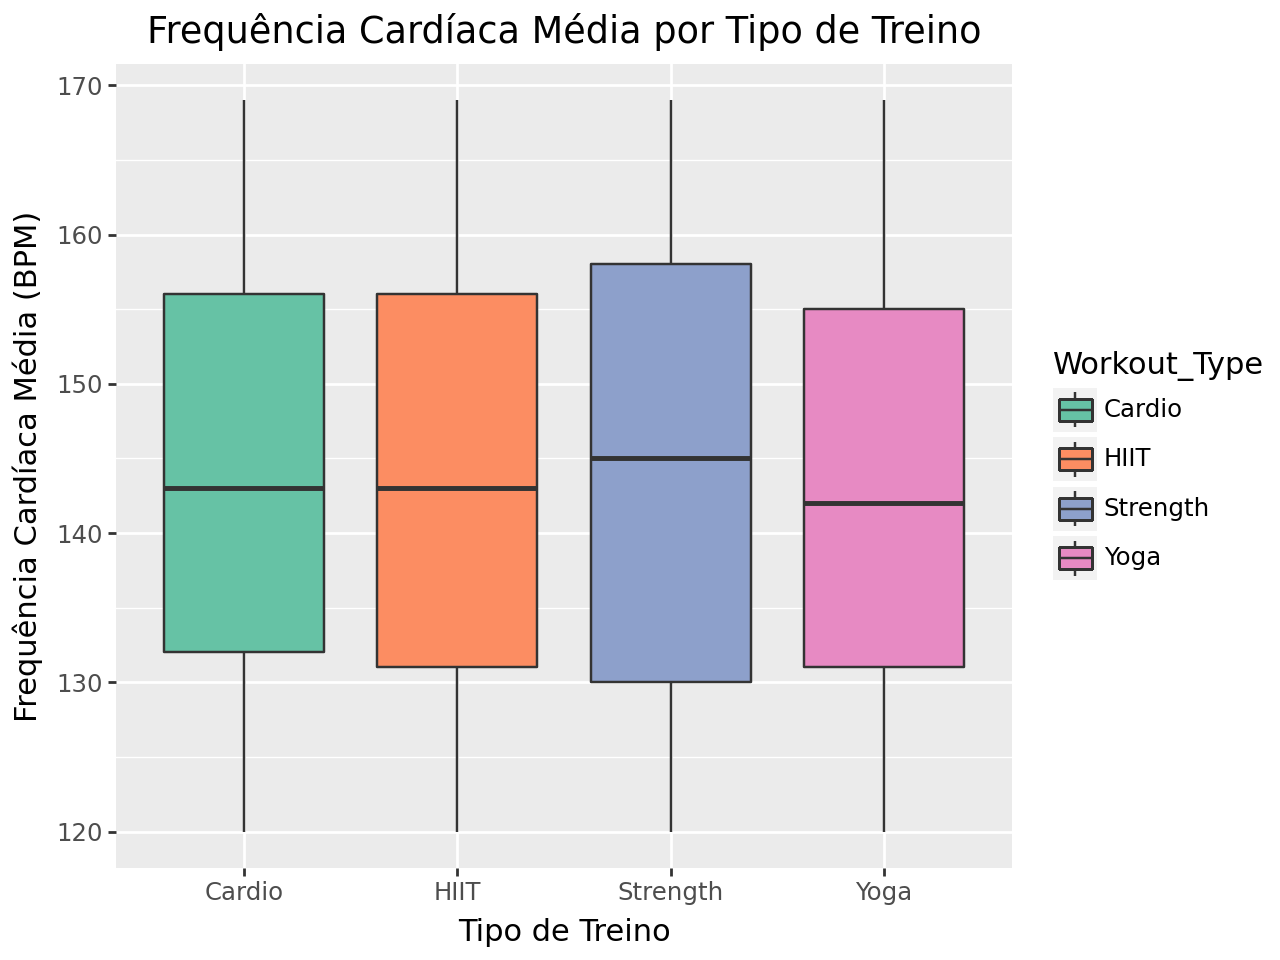

In [73]:

# Explore average BPM to analyze workout intensity
plot_avg_bpm = (
    ggplot(df_gym, aes(x="Workout_Type", y="Avg_BPM", fill="Workout_Type"))  # Add fill aesthetic for colors
    + geom_boxplot()  # Display average BPM distribution by workout type
    + labs(
        title="Frequência Cardíaca Média por Tipo de Treino", 
        x="Tipo de Treino",  
        y="Frequência Cardíaca Média (BPM)"  
    )
    + scale_fill_brewer(type="qual", palette="Set2")  # Use a qualitative color palette
)

print(plot_avg_bpm)


O gráfico de **boxplot** exibe a **frequência cardíaca média (BPM)** registrada para diferentes **tipos de treino** (Cardio, HIIT, Strength e Yoga). A análise sugere:

- **Cardio** e **HIIT** possuem medianas similares, próximas de **140 BPM**, indicando intensidade moderada nesses treinos.
- **Strength** apresenta uma mediana ligeiramente mais alta, próxima de **145 BPM**, sugerindo que, em média, os treinos de força envolvem maior esforço cardiovascular.
- **Yoga** tem a menor mediana, por volta de **135 BPM**, refletindo sua menor demanda cardiovascular, coerente com sua natureza de baixa intensidade.
- A variabilidade em **Yoga** é mais acentuada, indicando que a frequência cardíaca média pode variar bastante dependendo do estilo ou prática específica.
- Todos os tipos de treino apresentam whiskers indicando uma ampla dispersão nos valores, mas sem grandes discrepâncias entre os treinos mais intensos.

A frequência cardíaca média reflete as demandas características de cada tipo de treino. **Strength** tende a exigir mais esforço médio que **Cardio** e **HIIT**, enquanto **Yoga** se destaca como uma atividade menos intensa em termos cardiovasculares, mas com maior variabilidade entre os praticantes.

### 8. Duração da seção e calorias consumidas

C:\Users\raiss\AppData\Local\Temp\ipykernel_912\529600431.py:14: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


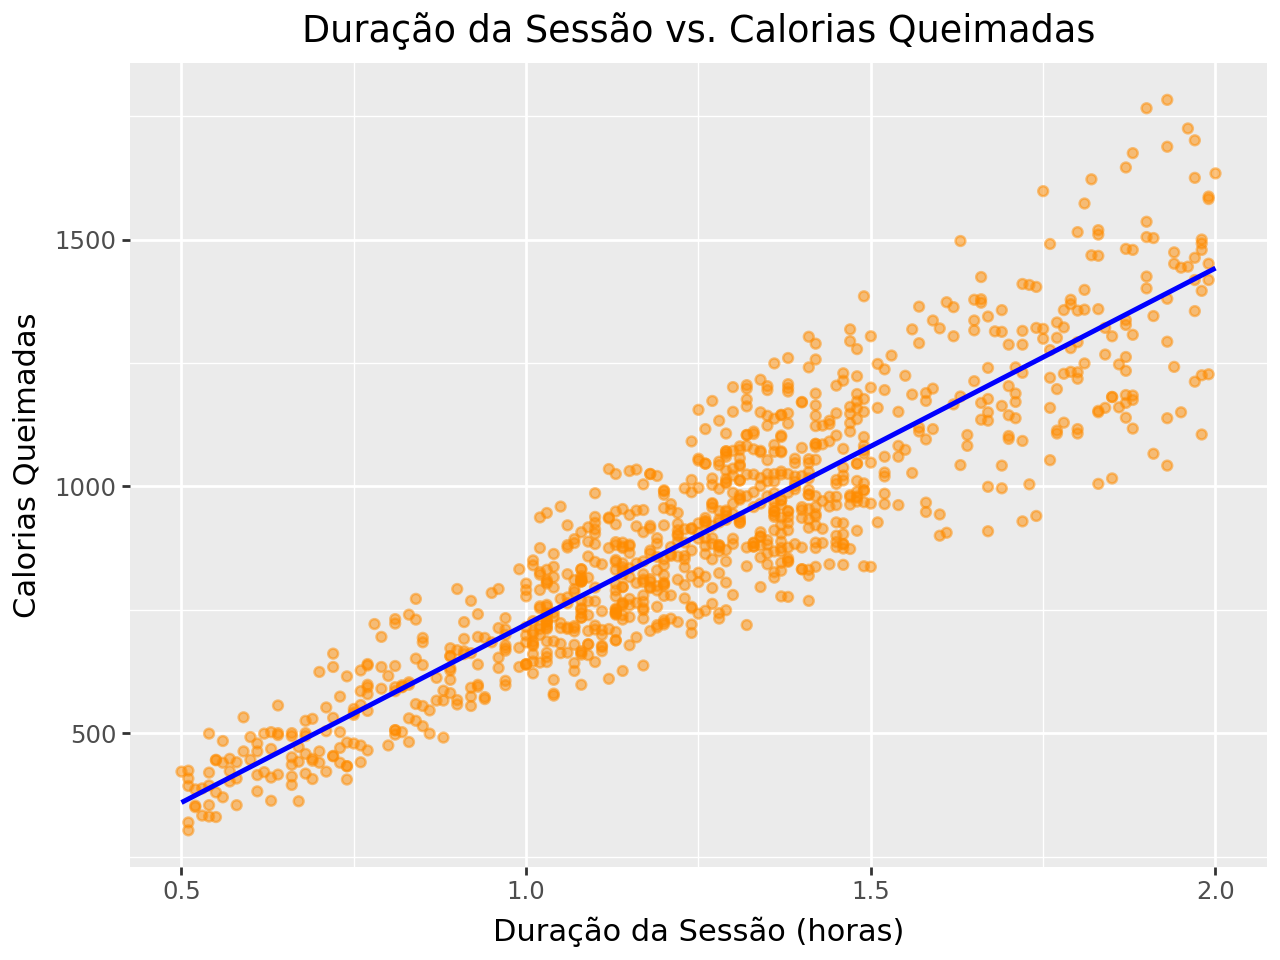

In [74]:

# Check if session duration is associated with calories burned
plot_session_duration_calories = (
    ggplot(df_gym, aes(x="Session_Duration (hours)", y="Calories_Burned")) 
    + geom_point(alpha=0.5, color="darkorange")  # Add points with semi-transparency for better visibility
    + geom_smooth(method="lm", se=False, color="blue")  # Add regression line in blue
    + labs(
        title="Duração da Sessão vs. Calorias Queimadas",  
        x="Duração da Sessão (horas)",  
        y="Calorias Queimadas"  
    )
    + theme()  # Optional: Add theme customization if needed
)

print(plot_session_duration_calories)


O gráfico de dispersão mostra a relação entre a **duração da sessão de treino (em horas)** e as **calorias queimadas**, acompanhado de uma linha de tendência (em azul).

- Há uma **correlação positiva clara**: sessões mais longas resultam em maior gasto calórico.
- A linha de tendência confirma a relação linear entre as variáveis, indicando que o aumento na duração da sessão está associado a um incremento consistente no número de calorias queimadas.
- A dispersão dos pontos sugere alguma variabilidade no gasto calórico para uma mesma duração de treino, o que pode ser atribuído a fatores como intensidade, tipo de exercício e características individuais.
- Os valores mais altos de calorias queimadas são observados em sessões próximas de **2 horas**, enquanto sessões mais curtas (menos de 1 hora) apresentam os menores valores de gasto calórico.

A **duração da sessão** é um fator significativo para o gasto calórico, sendo uma métrica importante para avaliar a intensidade e eficácia do treino. No entanto, a variabilidade indica que outros fatores também influenciam o resultado.

### 9. Correlações

In [75]:
df_encoded.corr().to_clipboard()

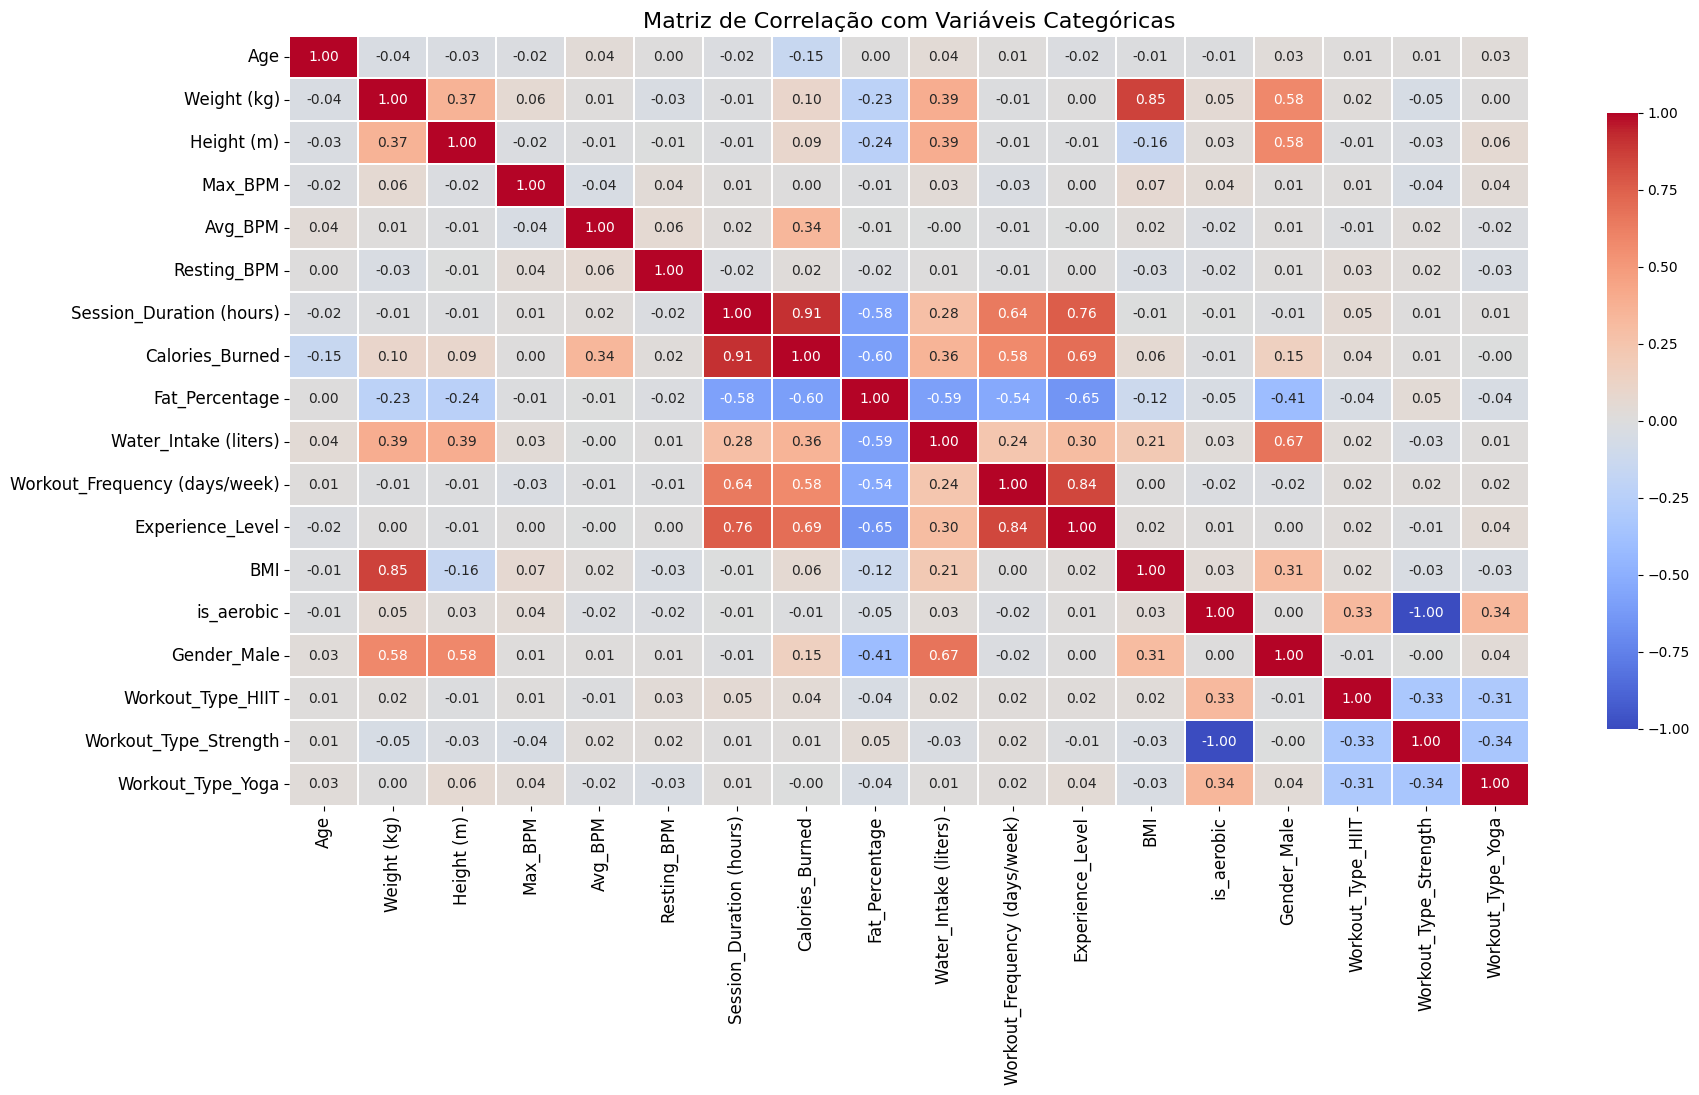

In [76]:
# Calculate the correlation matrix for the encoded dataset
correlation_matrix = df_encoded.corr()

# Plotting the correlation matrix with a heatmap for better visualization
plt.figure(figsize=(20, 10))
sns.heatmap(
    correlation_matrix,
    annot=True,  # Display correlation values
    cmap="coolwarm",  # Use a diverging color palette
    fmt=".2f",  # Format values to 2 decimal places
    linewidths=0.2,  # Add gridlines for clarity
    cbar_kws={"shrink": 0.8}  # Adjust color bar size
)
plt.title("Matriz de Correlação com Variáveis Categóricas", fontsize=16)  
plt.xticks(fontsize=12, rotation=90)  # Adjust x-axis labels
plt.yticks(fontsize=12, rotation=0)  # Adjust y-axis labels
plt.show()


A matriz de correlação apresentada oferece insights sobre as relações entre variáveis contínuas e categóricas do dataset. Aqui estão as observações principais:

#### Destaques de Correlações Fortes:
1. **Peso (Weight) e IMC (BMI):**
   - Correlação positiva muito alta (**0.85**), confirmando que o peso é um dos principais determinantes do IMC.

2. **Duração da Sessão (Session_Duration) e Calorias Queimadas (Calories_Burned):**
   - Correlação positiva forte (**0.91**), confirmando que sessões mais longas estão fortemente associadas a maior gasto calórico.

3. **Frequência de Treino (Workout_Frequency) e Nível de Experiência (Experience_Level):**
   - Correlação alta (**0.84**), sugerindo que indivíduos mais experientes tendem a treinar com maior frequência.

4. **Ingestão de Água (Water_Intake) e Peso:**
   - Correlação positiva moderada (**0.39**), sugerindo que indivíduos mais pesados tendem a consumir mais água.

#### Observações de Correlações do Percentual de Gordura:
1. **Percentual de Gordura (Fat_Percentage) e Duração da Sessão (Session_Duration):**
   - Correlação negativa significativa (**-0.58**), indicando que indivíduos com maior percentual de gordura tendem a realizar sessões de treino mais curtas.

2. **Percentual de Gordura (Fat_Percentage) e Calorias Queimadas (Calories_Burned):**
   - Correlação negativa forte (**-0.60**), sugerindo que indivíduos com maior percentual de gordura têm menor gasto calórico, possivelmente devido a menor intensidade ou duração do treino.

3. **Percentual de Gordura (Fat_Percentage) e Frequência de Treino (Workout_Frequency):**
   - Correlação negativa moderada (**-0.54**), reforçando que maior gordura corporal pode estar associada a menor frequência de treinos.

4. **Percentual de Gordura (Fat_Percentage) e Peso:**
   - Correlação negativa moderada (**-0.23**), indicando que maior peso nem sempre está associado a maior percentual de gordura.

### Variáveis Categóricas:
1. **Gênero Masculino (Gender_Male) e Peso/IMC:**
   - Correlação positiva moderada com peso (**0.58**) e IMC (**0.31**), indicando que homens tendem a ter maior peso e IMC no dataset.

2. **Tipo de Treino (Workout_Type_HIIT):**
   - Apresenta correlação fraca com a maioria das variáveis, sugerindo que o tipo de treino não influencia significativamente os indicadores analisados.

#### Conclusão da correlação:
A matriz revela padrões claros de associação, especialmente entre variáveis relacionadas ao peso, IMC, frequência de treino e duração das sessões. Esses insights podem orientar estratégias de treino personalizadas, focadas em otimizar calorias queimadas e melhorar a composição corporal. As correlações negativas envolvendo o percentual de gordura destacam a importância de considerar outros fatores, como intensidade do treino, no planejamento de atividades.

### Conclusão Geral da Análise Exploratória de Dados (EDA)

A análise exploratória realizada revelou informações significativas sobre o comportamento e as relações entre as variáveis no dataset. Aqui estão as principais conclusões organizadas:

1. **Dados Completos e Resumo Estatístico:**
   - Não há valores nulos no dataset, garantindo a integridade dos dados para análise.
   - O resumo estatístico fornece uma visão geral sobre a distribuição e variação das variáveis, facilitando a identificação de padrões e outliers.

2. **Distribuição dos Tipos de Treino:**
   - A maioria dos participantes realiza treinos de **Cardio** e **Strength**, enquanto **Yoga** e **HIIT** são menos frequentes.
   - A distribuição equilibrada sugere diversidade nas preferências e objetivos de treino.

3. **Calorias Gastas por Tipo de Treino:**
   - Treinos de **Cardio**, **HIIT** e **Strength** têm medianas de calorias queimadas semelhantes, com maior variabilidade em **Strength** e **Yoga**.
   - **Yoga**, embora menos intenso, apresenta ampla variação de calorias queimadas, indicando influência de fatores como estilo e duração.

4. **Distribuição do IMC:**
   - A maioria dos participantes está na faixa de peso normal ou sobrepeso (IMC entre 18 e 30).
   - Diferentes tipos de treino atraem perfis variados de IMC, mas a mediana geral é próxima de 25.

5. **Frequência dos Treinos e Calorias Queimadas:**
   - Há uma correlação positiva clara entre a frequência de treino e o gasto calórico médio.
   - A variabilidade indica que outros fatores, como intensidade e duração do treino, também desempenham um papel importante.

6. **Frequência Cardíaca por Tipo de Treino:**
   - Treinos de **Cardio**, **HIIT** e **Strength** demandam esforços cardiovasculares mais intensos e consistentes, enquanto **Yoga** é menos exigente, com maior variação entre os praticantes.
   - A frequência cardíaca máxima é similar para **Cardio**, **HIIT** e **Strength**, mas menor para **Yoga**, alinhada com sua natureza de baixa intensidade.

7. **Duração da Sessão e Calorias Queimadas:**
   - Sessões mais longas resultam em maior gasto calórico, com uma correlação positiva forte.
   - Apesar da relação linear, a variabilidade nos gastos calóricos sugere a influência de outros fatores, como intensidade e tipo de treino.

8. **Correlação entre Variáveis:**
   - Relações significativas incluem:
     - **Peso** e **IMC** (correlação positiva muito alta).
     - **Duração da Sessão** e **Calorias Queimadas** (correlação positiva forte).
     - **Frequência de Treino** e **Nível de Experiência** (correlação positiva forte).
   - O **Percentual de Gordura** tem correlação negativa com **Duração da Sessão**, **Calorias Queimadas** e **Frequência de Treino**, destacando desafios enfrentados por indivíduos com maior gordura corporal.
   - Variáveis categóricas como **gênero** também influenciam aspectos como peso e IMC.

A análise identificou padrões relevantes, relações fortes entre variáveis e fatores que impactam o desempenho e os resultados dos treinos. Os insights obtidos podem ser usados para personalizar estratégias de treino, otimizar resultados e atender às necessidades individuais dos participantes. Além disso, a variabilidade observada em algumas métricas reforça a importância de um planejamento mais detalhado, considerando aspectos como intensidade, tipo e duração dos treinos.


# Qual tipo de exercício é mais eficaz em queimar calorias?

Uma pergunta comum entre entusiastas do esporte e indivíduos que buscam perder peso é: **Qual tipo de exercício—**aeróbico ou anaeróbico**—queima mais calorias?** Nesta análise, buscamos responder a essa pergunta examinando dados de treino de diversos indivíduos, categorizando cada sessão pelo tipo de treino (aeróbico ou anaeróbico) e registrando as calorias queimadas.

Para abordar essa questão, nossa abordagem incluirá:

- **Exploração de Dados**:  
  - Calcular estatísticas descritivas para obter insights sobre cada tipo de treino.  
  - Visualizar distribuições de dados para observar possíveis diferenças no gasto calórico entre os tipos de exercício.

- **Teste de Hipótese**:  
  - Formular hipóteses nula e alternativa sobre a influência do tipo de treino no gasto calórico.  
  - Conduzir um teste de permutação para determinar se as diferenças observadas são estatisticamente significativas.

Ao final desta análise, esperamos esclarecer se o tipo de treino exerce um papel significativo no gasto calórico.

## Transformação

Nesta seção, descrevemos as etapas de pré-processamento realizadas para preparar os dados para análise.

Para simplificar a análise, focaremos exclusivamente em duas variáveis principais: `Workout_Type` e `Calories_Burned`. Assim, o DataFrame será reduzido para reter apenas essas colunas, eliminando quaisquer variáveis não relacionadas.

Após essa redução, examinaremos todos os valores únicos presentes na coluna `Workout_Type`. Isso garantirá que os dados estejam limpos e que as categorias de treino (aeróbico ou anaeróbico) sejam devidamente identificadas para a análise subsequente.

In [77]:
df_calories = df_gym[['Calories_Burned', 'Workout_Type']].copy(deep=True)

In [78]:
workout_types = df_gym['Workout_Type'].unique()

print(f"Tipos de treino: {workout_types}")


Tipos de treino: ['Yoga' 'HIIT' 'Cardio' 'Strength']


Neste conjunto de dados, temos quatro tipos distintos de treino. Para entender melhor seu impacto no corpo, classificaremos cada um como aeróbico ou anaeróbico com base em suas principais características:

- **Strength**: Anaeróbico  
- **Yoga**: Anaeróbico  
- **Cardio**: Aeróbico  
- **HIIT**: Aeróbico  

A maioria dessas classificações é direta, considerando os efeitos fisiológicos amplamente estabelecidos de cada tipo de treino. No entanto, o **Yoga** apresenta um caso único devido à sua diversidade de estilos, que podem variar em intensidade e foco.

Embora o Yoga seja diverso, muitos estilos—como Power Yoga e Vinyasa—se concentram mais em força, flexibilidade e manutenção de posturas do que em movimento contínuo ou atividade cardiovascular. Isso o torna mais semelhante a outros exercícios anaeróbicos que desenvolvem força sem alta demanda contínua de oxigênio.

Portanto, nesta análise, classificamos o Yoga como **anaeróbico**, com base nessas características.

In [79]:
# Converts workout types to either Aerobic or Anaerobic

dict_convert = {
    'Yoga': 'Anaerobic',
    'HIIT': 'Aerobic',
    'Cardio': 'Aerobic',
    'Strength': 'Anaerobic',
}

df_calories['Workout_Type'] = df_calories['Workout_Type'].map(dict_convert)

display(df_calories.head())


,Calories_Burned,Workout_Type
0,1313.0,Anaerobic
1,883.0,Aerobic
2,677.0,Aerobic
3,532.0,Anaerobic
4,556.0,Anaerobic


## Exploração dos Dados

In [80]:
df_calories.groupby('Workout_Type').count()

,Calories_Burned
Workout_Type,
Aerobic,476
Anaerobic,497


Podemos ver que a distribuição de treinos aerobicos e anaerobicos esta muito proxima 

In [81]:
# Display statistics for each workout type

# Statistics for Aerobic workouts
print("\nEstatísticas para treinos Aeróbicos")
df_aerobic = df_calories[df_calories['Workout_Type'] == 'Aerobic']  # Filter data for Aerobic workouts
display(df_aerobic.describe())  # Display descriptive statistics for Aerobic workouts

# Statistics for Anaerobic workouts
print("\nEstatísticas para treinos Anaeróbicos")
df_anaerobic = df_calories[df_calories['Workout_Type'] == 'Anaerobic']  # Filter data for Anaerobic workouts
display(df_anaerobic.describe())  # Display descriptive statistics for Anaerobic workouts



Estatísticas para treinos Aeróbicos


,Calories_Burned
count,476.000000
mean,903.684874
std,272.693322
min,303.000000
25%,728.500000
50%,900.000000
75%,1081.250000
max,1766.000000



Estatísticas para treinos Anaeróbicos


,Calories_Burned
count,497.000000
mean,907.086519
std,272.856253
min,330.000000
25%,714.000000
50%,885.000000
75%,1074.000000
max,1783.000000


### **Comparação entre Aeróbico e Anaeróbico**
1. **Médias Semelhantes**: As médias de calorias queimadas são muito próximas (903,68 para aeróbicos e 907,08 para anaeróbicos), indicando que, em média, o gasto calórico é equivalente entre os dois tipos de treino.
2. **Dispersão Similar**: O desvio padrão é quase idêntico, sugerindo que a variabilidade nos dois grupos é comparável.
3. **Intervalos e Quartis**: Ambos os grupos têm distribuições semelhantes, com valores mínimos, máximos e quartis próximos, sugerindo que os dois tipos de treino oferecem padrões similares de gasto calórico.

Os resultados preliminares indicam que não há uma diferença marcante no gasto calórico médio entre treinos aeróbicos e anaeróbicos. Essa semelhança será investigada mais a fundo com testes estatísticos, como o teste de permutação, para determinar se essas diferenças observadas são estatisticamente significativas.

## Visualização das Distribuições

### Gráfico de Violino

C:\Users\raiss\AppData\Local\Temp\ipykernel_912\554431363.py:14: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


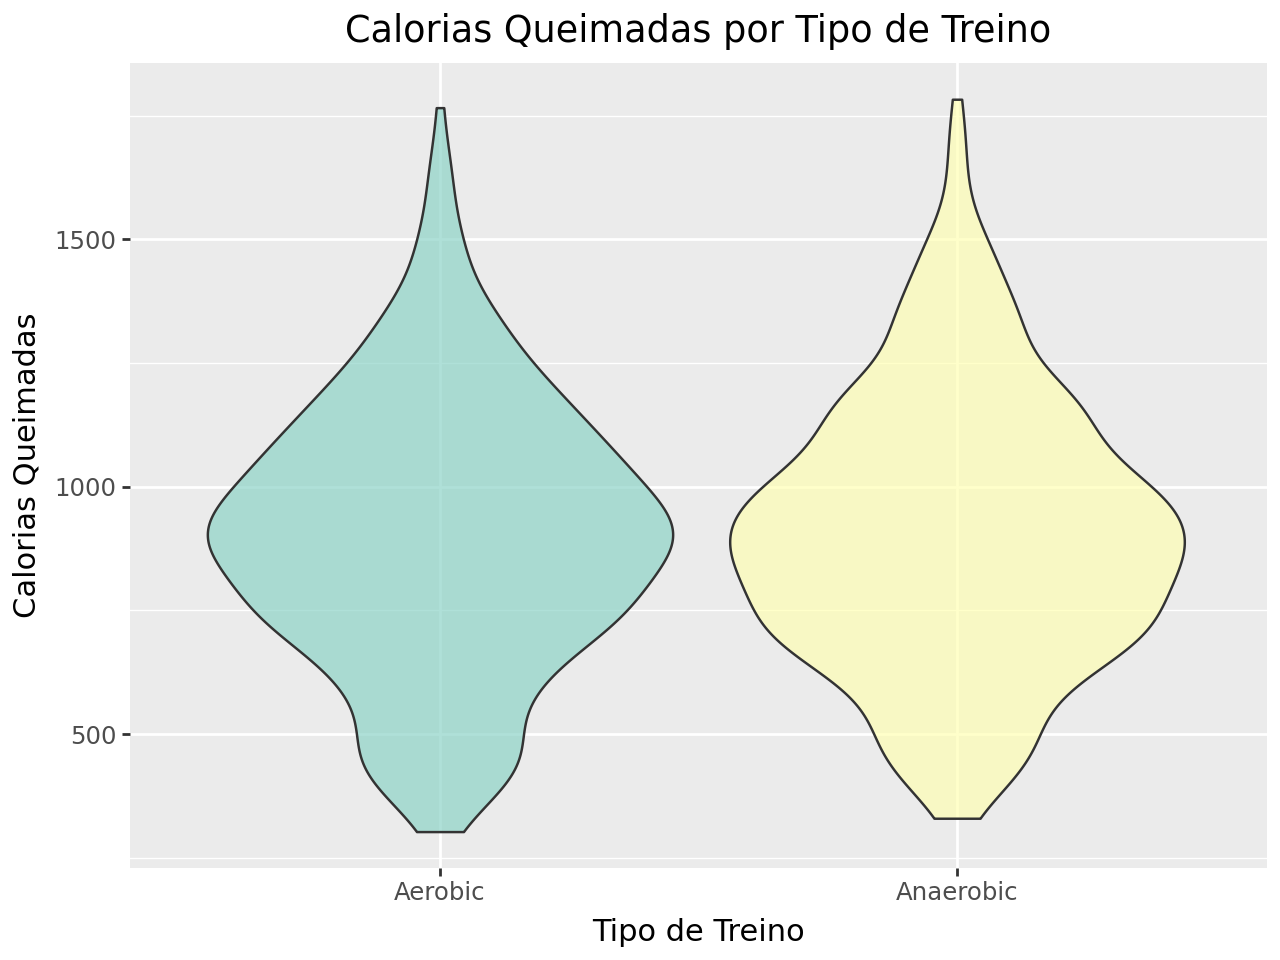

In [82]:

# Violin plot for Calories Burned by Workout Type
plot = (
    ggplot(df_calories, aes(x='Workout_Type', y='Calories_Burned', fill='Workout_Type'))  # Add fill aesthetic for colors
    + geom_violin(alpha=0.7)  # Violin plot with transparency
    + labs(
        title='Calorias Queimadas por Tipo de Treino',  
        x='Tipo de Treino',  
        y='Calorias Queimadas'  
    )
    + scale_fill_brewer(type='qual', palette='Set3')  # Add a qualitative color palette
    + theme(legend_position='none')  # Remove legend as it might be redundant
)

print(plot)


O gráfico de violino exibe a **distribuição das calorias queimadas** por tipo de treino (Aeróbico e Anaeróbico). Algumas observações importantes podem ser feitas:

**1. Semelhança na Distribuição Geral**
- Ambos os tipos de treino apresentam uma distribuição semelhante, com formatos simétricos e faixas de calorias queimadas comparáveis, que variam aproximadamente entre **500 e 1750 calorias**.
- A densidade central (área mais ampla) está concentrada próxima à média de **900 calorias** para ambos os grupos, confirmando a similaridade identificada nas estatísticas descritivas.

**2. Pequenas Diferenças na Dispersão**
- Os treinos **aeróbicos** apresentam uma distribuição ligeiramente mais concentrada no centro, sugerindo uma menor variabilidade nos valores médios de calorias queimadas.
- Já os treinos **anaeróbicos** mostram uma distribuição mais ampla nas extremidades, indicando uma maior variabilidade em calorias queimadas entre os indivíduos.

**3. Extremidades e Outliers**
- Em ambos os tipos de treino, existem registros extremos (valores mínimos e máximos), mas eles são relativamente poucos e não parecem influenciar significativamente as tendências centrais.


Este gráfico reforça as semelhanças identificadas nas análises estatísticas anteriores, sugerindo que o tipo de treino (aeróbico ou anaeróbico) tem um impacto similar no gasto calórico. Essas observações indicam que fatores adicionais, como intensidade, duração ou características individuais, podem ter um papel mais relevante no gasto calórico do que o tipo de treino em si.

### Gráfico de Densidade

C:\Users\raiss\AppData\Local\Temp\ipykernel_912\3505224981.py:14: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


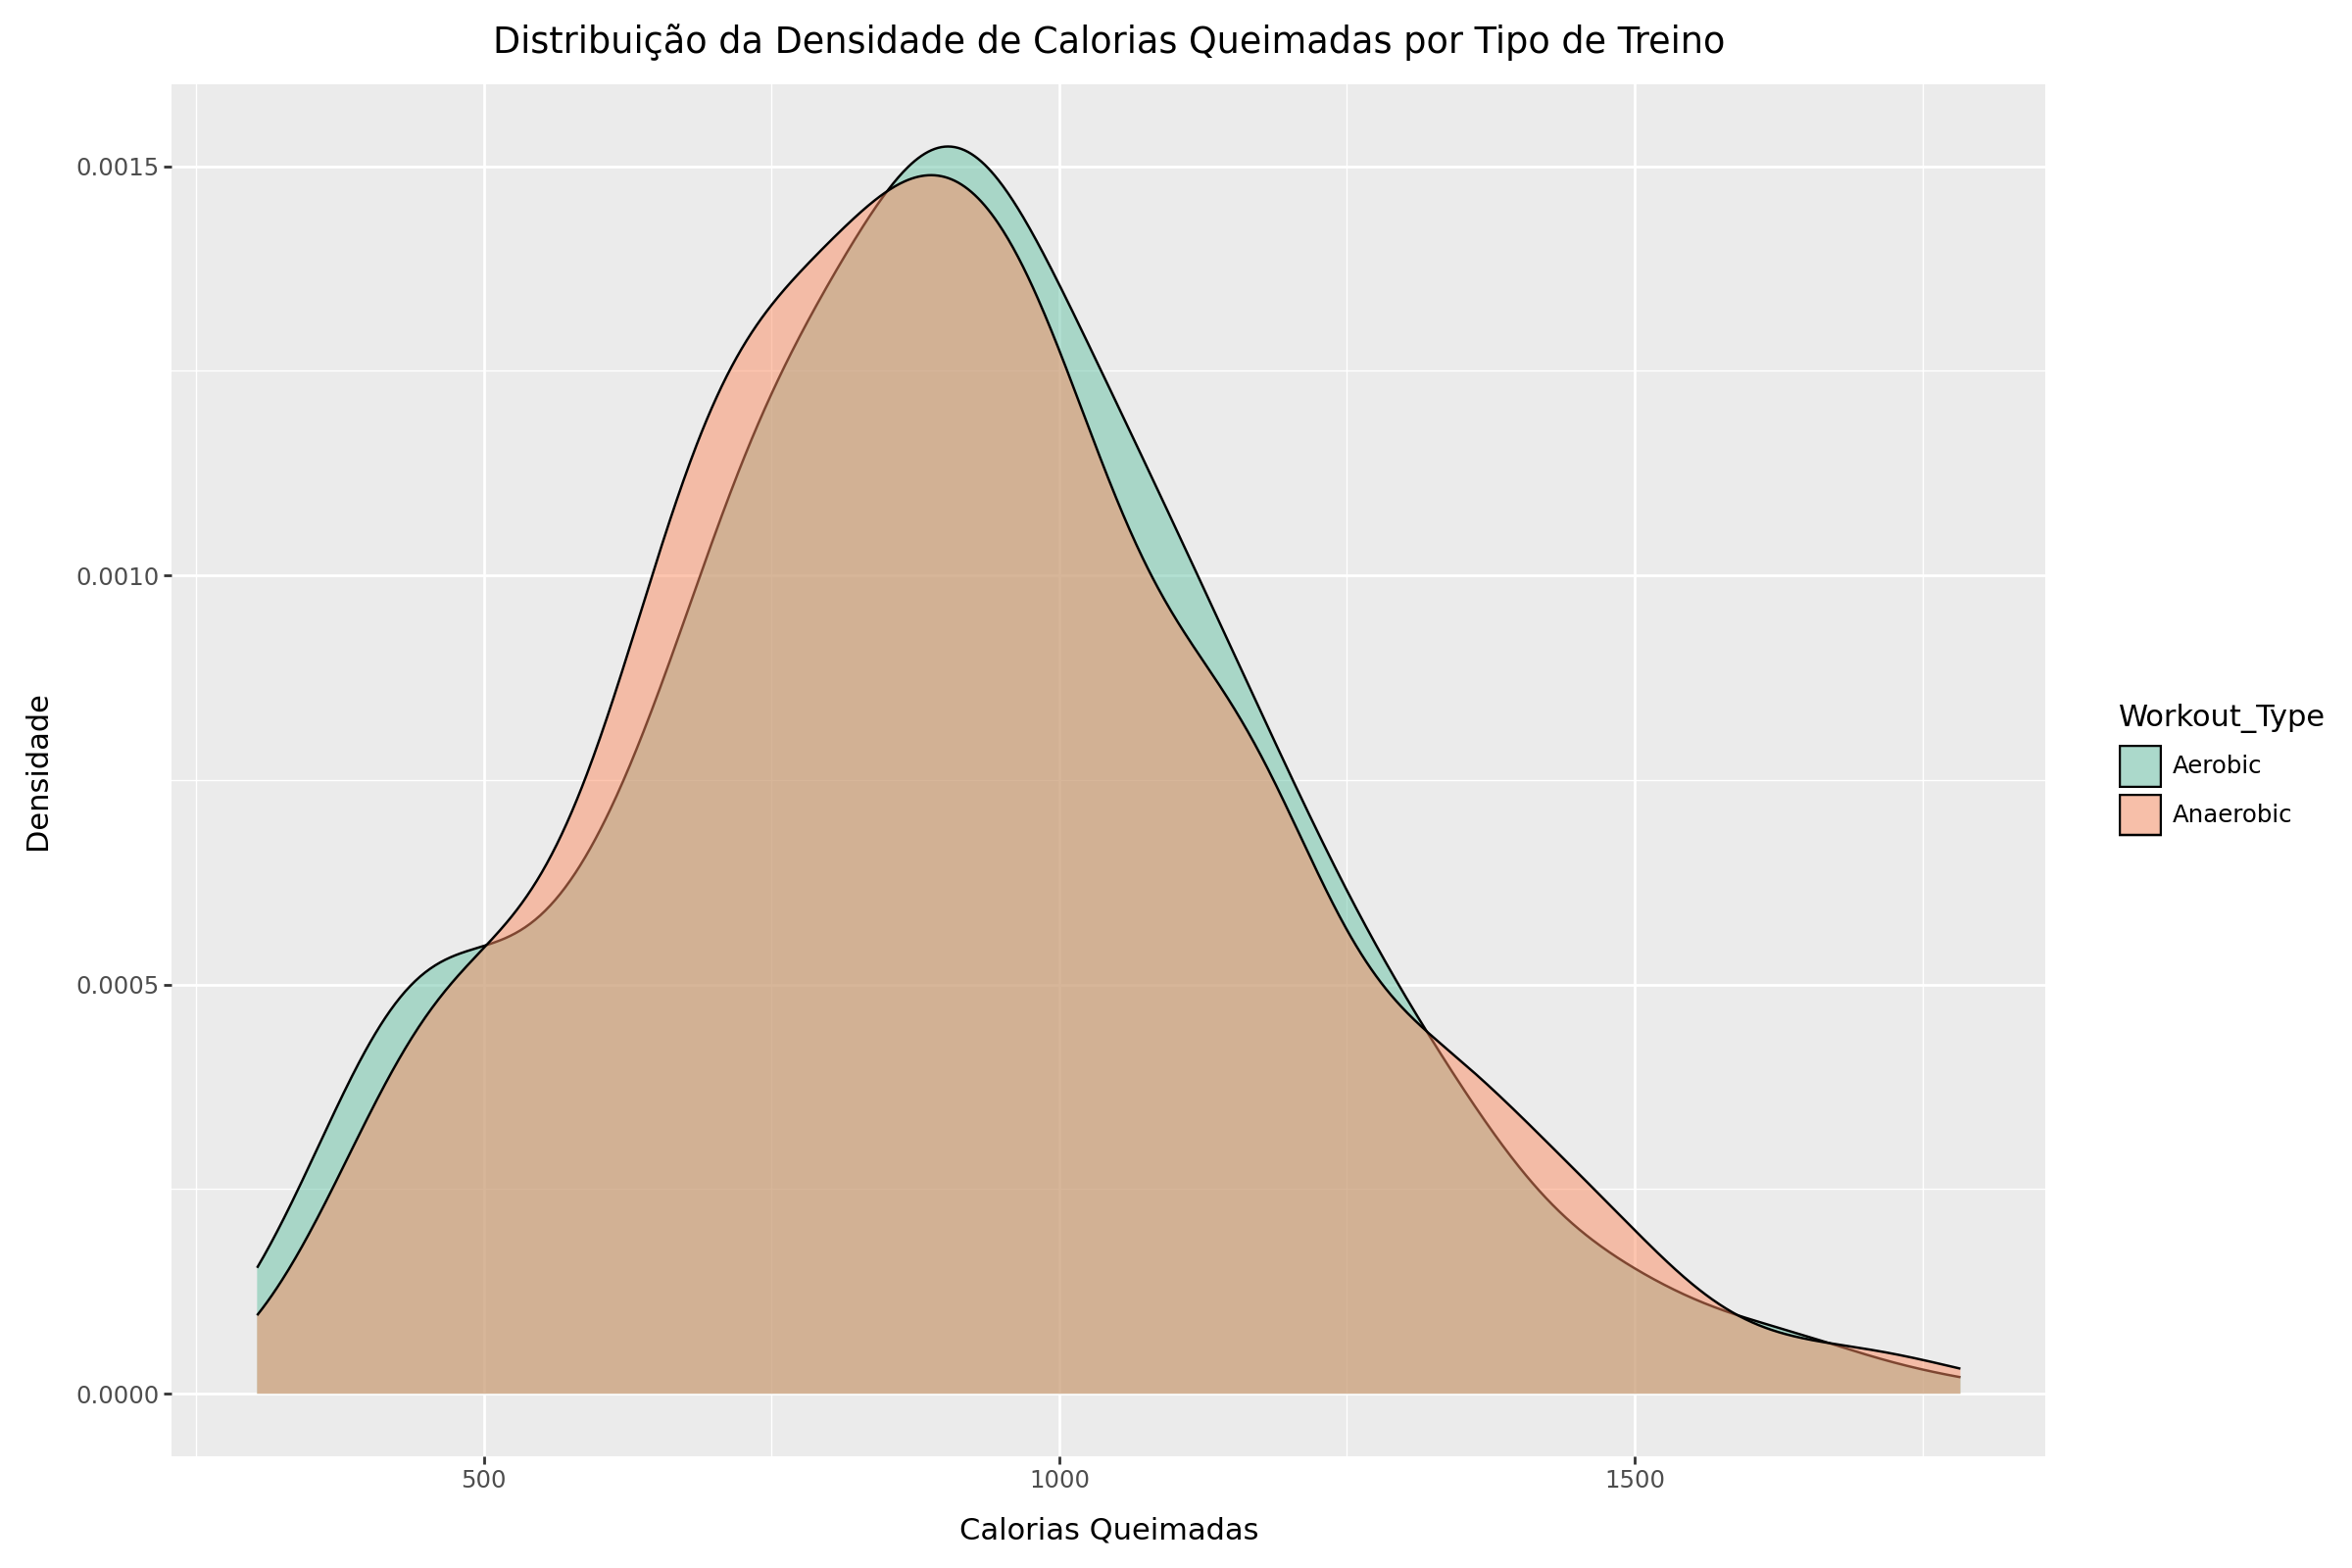

In [83]:
# Plots the distribution of calories burned for each workout type
plot = (
    ggplot(df_calories, aes(x='Calories_Burned', fill='Workout_Type'))  # Add fill aesthetic for colors
    + geom_density(alpha=0.5)  # Add transparency to density plots
    + labs(
        title='Distribuição da Densidade de Calorias Queimadas por Tipo de Treino', 
        x='Calorias Queimadas',  
        y='Densidade'  
    )
    + scale_fill_brewer(type='qual', palette='Set2')  # Use a qualitative palette for distinct colors
    + theme(figure_size=(12, 8))  # Adjust title size and style
)

print(plot)


O gráfico de densidade apresenta a distribuição das calorias queimadas por tipo de treino (**Aeróbico** e **Anaeróbico**) e oferece as seguintes observações:

**1. Sobreposição Substancial**
- As distribuições de calorias queimadas para treinos aeróbicos e anaeróbicos são altamente sobrepostas, indicando que os valores de calorias queimadas entre os dois tipos de treino são bastante semelhantes.
- Essa sobreposição reforça a ideia de que ambos os tipos de treino possuem impactos similares no gasto calórico.

**2. Picos e Formatos**
- **Pico das Distribuições**: Ambas as curvas apresentam picos próximos de **900 calorias**, indicando que esse é o valor mais comum para calorias queimadas em ambos os treinos.
- **Caudas Longas**: As duas distribuições apresentam caudas à direita, indicando a presença de algumas sessões com gasto calórico mais elevado.

**3. Diferenças Leves**
- A curva dos treinos **anaeróbicos** é ligeiramente mais alta na faixa central (800–1000 calorias), sugerindo uma leve concentração maior nessa faixa de gasto calórico.
- A curva dos treinos **aeróbicos** mostra uma densidade mais uniforme, indicando uma distribuição ligeiramente mais variada.


O gráfico de densidade confirma as análises anteriores: **não há diferenças substanciais no gasto calórico médio entre treinos aeróbicos e anaeróbicos**. Isso sugere que outros fatores, como duração, intensidade ou características individuais, podem ser mais determinantes para o gasto calórico do que o tipo de treino em si. A semelhança nas distribuições destaca a eficácia de ambos os tipos de treino para queima calórica em geral.

### Histograma

C:\Users\raiss\AppData\Local\Temp\ipykernel_912\2805010497.py:14: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


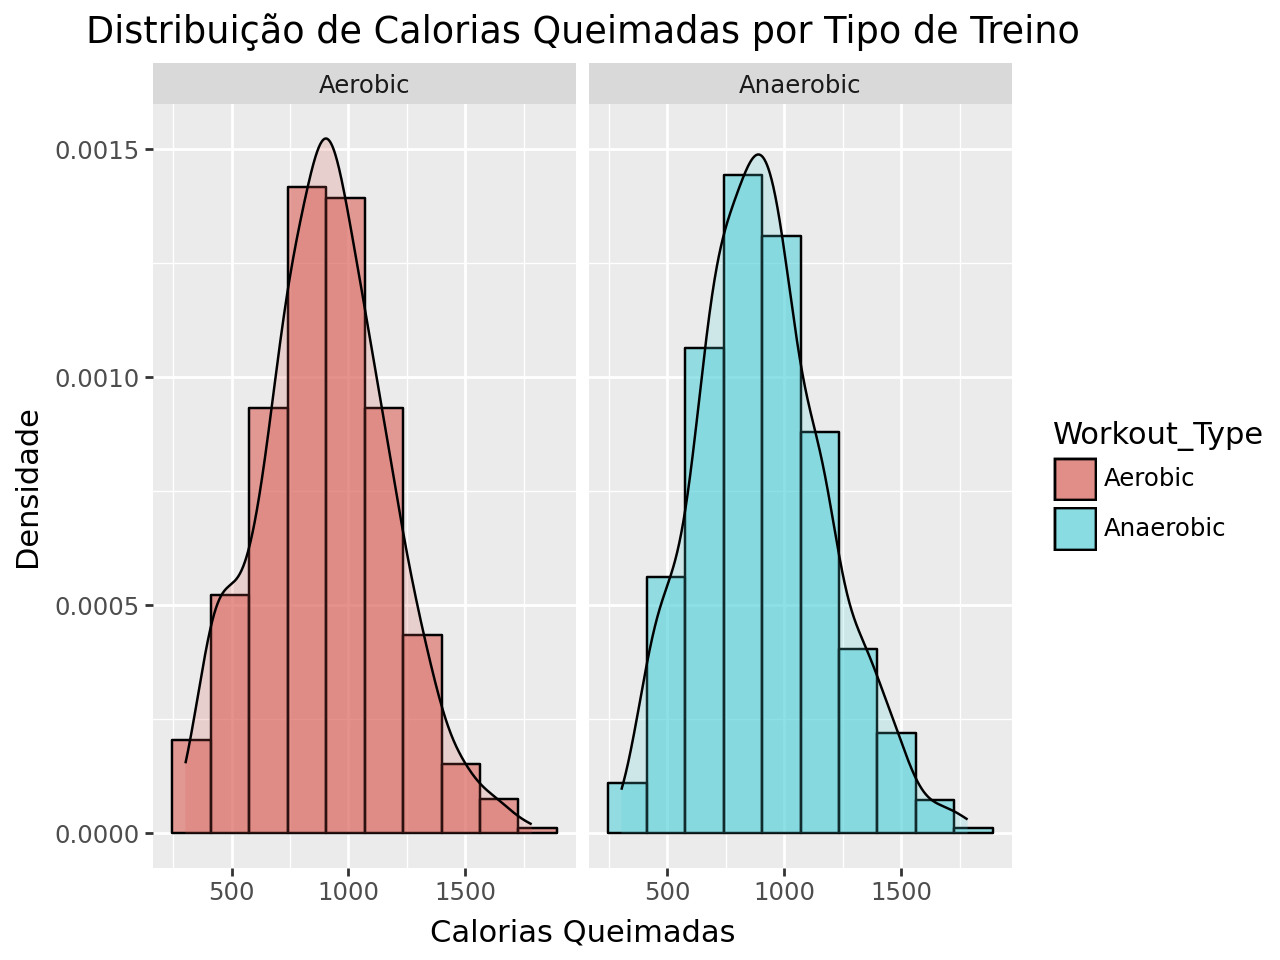

In [84]:
# Histogram with KDE for BMI by Workout Type using facets
plot_histogram_kde = (
    ggplot(df_calories, aes(x="Calories_Burned", fill="Workout_Type")) 
    + geom_histogram(aes(y="..density.."), bins=10, alpha=0.6, color="black")  # Add histogram with density scaling
    + geom_density(alpha=0.2)  # Add density overlay
    + facet_wrap("~Workout_Type")  # Create facets for each Workout_Type
    + labs(
        title="Distribuição de Calorias Queimadas por Tipo de Treino",  
        x="Calorias Queimadas", 
        y="Densidade"  
    )
)

print(plot_histogram_kde)


O gráfico apresenta as **distribuições de calorias queimadas** separadamente para treinos **aeróbicos** e **anaeróbicos**, combinando histogramas com curvas de densidade. As seguintes observações podem ser feitas:

**1. Formato Similar das Distribuições**
- Ambos os tipos de treino mostram distribuições aproximadamente simétricas, com picos próximos de **900 calorias**, sugerindo que a maioria das sessões de treino concentra-se nessa faixa de calorias queimadas.
- A dispersão das distribuições é similar, com valores variando de aproximadamente **500 a 1500 calorias**.

**2. Leve Diferença na Concentração**
- A densidade central dos treinos **aeróbicos** parece ligeiramente maior entre **850 e 1000 calorias**, indicando uma maior proporção de sessões nessa faixa.
- Nos treinos **anaeróbicos**, a densidade parece um pouco mais uniforme em toda a faixa, sugerindo uma distribuição levemente mais ampla.

**3. Consistência entre as Categorias**
- Os histogramas reforçam a ideia de que **não há diferenças substanciais** entre os dois tipos de treino em termos de calorias queimadas.
- As caudas são similares, com poucas sessões extremas queimando muito menos ou muito mais calorias.


Este gráfico confirma os padrões observados anteriormente: **o gasto calórico médio e a distribuição das calorias queimadas são extremamente parecidos entre treinos aeróbicos e anaeróbicos**. Essas semelhanças indicam que ambos os tipos de treino oferecem desempenhos energéticos equivalentes, e que outros fatores, como duração e intensidade, provavelmente têm um impacto mais significativo no gasto calórico.

### Conclusão das Distribuições

A partir dos gráficos apresentados (violino, densidade e histogramas), podemos concluir que **não há diferenças significativas no gasto calórico médio entre treinos aeróbicos e anaeróbicos**. As análises reforçam que ambos os tipos de treino apresentam desempenhos energéticos semelhantes, com padrões de distribuição consistentes.

**Pontos Principais:**
1. **Distribuição Similar**: 
   - Os treinos aeróbicos e anaeróbicos têm picos próximos de **900 calorias** e intervalos que variam de aproximadamente **500 a 1750 calorias**, evidenciando uma semelhança notável nas distribuições.
   - As distribuições são simétricas, com caudas longas indicando sessões extremas (com maior ou menor gasto calórico), mas sem impacto significativo nas tendências centrais.

2. **Leves Diferenças**:
   - **Aeróbico**: Apresenta uma densidade ligeiramente mais concentrada no intervalo **850–1000 calorias**, indicando menos variabilidade.
   - **Anaeróbico**: Mostra uma dispersão levemente maior, refletindo uma distribuição mais uniforme em toda a faixa analisada.

3. **Consistência nas Categorias**:
   - A alta sobreposição entre as distribuições reforça que o tipo de treino, por si só, não é determinante para o gasto calórico. A eficácia de ambos os tipos para queima calórica é equivalente.

No entanto, para avaliar formalmente essa observação, prosseguiremos com um teste de hipótese. Este teste nos ajudará a determinar se há uma diferença estatisticamente significativa na queima de calorias entre os treinos anaeróbicos e aeróbicos, permitindo alcançar uma conclusão mais rigorosa.

## Teste de Hipotese

Para avaliar formalmente se os exercícios aeróbicos queimam mais calorias do que os anaeróbicos, utilizaremos o **Teste de Permutação**. Essa abordagem não paramétrica é apropriada para comparar dois grupos quando os dados podem não seguir uma distribuição normal e é ideal para testar diferenças nas médias de amostras segmentadas.

#### Etapas do Teste de Permutação

1. **Definir a Estatística do Teste**:  
   A estatística de teste será a diferença nas médias de calorias queimadas entre os treinos aeróbicos e anaeróbicos, expressa como:
   $$
   \text{Diff} = \bar{X}_{\text{aeróbico}} - \bar{X}_{\text{anaeróbico}}
   $$
   onde $\bar{X}_{\text{aeróbico}}$ e $\bar{X}_{\text{anaeróbico}}$ representam as médias de calorias queimadas nos tipos de treino aeróbico e anaeróbico, respectivamente.

2. **Formular as Hipóteses**:
   - **Hipótese Nula ($H_0$)**: Não há diferença significativa na queima de calorias entre treinos aeróbicos e anaeróbicos.
     $$
     H_0: \bar{X}_{\text{aeróbico}} - \bar{X}_{\text{anaeróbico}} = 0
     $$
   - **Hipótese Alternativa ($H_1$)**: Treinos aeróbicos queimam significativamente mais calorias do que treinos anaeróbicos.
     $$
     H_1: \bar{X}_{\text{aeróbico}} - \bar{X}_{\text{anaeróbico}} > 0
     $$

3. **Processo de Permutação**:
   - Combine os valores de calorias queimadas dos dois tipos de treino em um único conjunto de dados.
   - Embaralhe aleatoriamente esse conjunto combinado e divida-o em dois grupos com os tamanhos originais.
   - Calcule a diferença nas médias entre esses grupos aleatórios.
   - Repita os dois passos anteriores várias vezes (e.g., 1.000 ou 10.000 permutações) para criar uma distribuição de diferenças de médias sob a hipótese nula.

4. **Calcular o p-valor**:
   - Compare a diferença observada entre as médias com a distribuição de permutação.
   - O p-valor será a proporção de diferenças de médias permutadas que são maiores ou iguais à diferença observada, indicando a probabilidade de observarmos uma diferença tão extrema quanto a nossa, caso a hipótese nula seja verdadeira.

Esse método nos permitirá determinar se a diferença observada na queima calórica entre treinos aeróbicos e anaeróbicos é estatisticamente significativa.

In [85]:
# Test Staticis: diff of avg calories burned between Aerobic and Anaerobic workouts
def calc_test_statistic(df):
    aerobic = df[df['Workout_Type'] == 'Aerobic']['Calories_Burned']
    anaerobic = df[df['Workout_Type'] == 'Anaerobic']['Calories_Burned']
    return np.mean(aerobic) - np.mean(anaerobic)


In [86]:
# Calculate the observed test statistic
observed_test_statistic = calc_test_statistic(df_calories)
print(f"Estatistica de teste observada: {observed_test_statistic}")

Estatistica de teste observada: -3.4016451651083344


In [87]:

def perm_test(df, n=2000, seed=42):
    np.random.seed(seed)
    test_stats = []
    df_copy = df.copy(deep=True)
    for _ in range(n):
        df_copy['Workout_Type'] = np.random.permutation(df_copy['Workout_Type'].values)
        test_stats.append(calc_test_statistic(df_copy))
    return test_stats

observed_test_statistic = calc_test_statistic(df_calories)

test_stats = perm_test(df_calories)

p_value = np.mean(test_stats > observed_test_statistic)

print(f"O p-value é: {p_value}")

# Test Staticis: diff of avg calories burned between Aerobic and Anaerobic workouts


O p-value é: 0.572


C:\Users\raiss\AppData\Local\Temp\ipykernel_912\1030384983.py:23: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


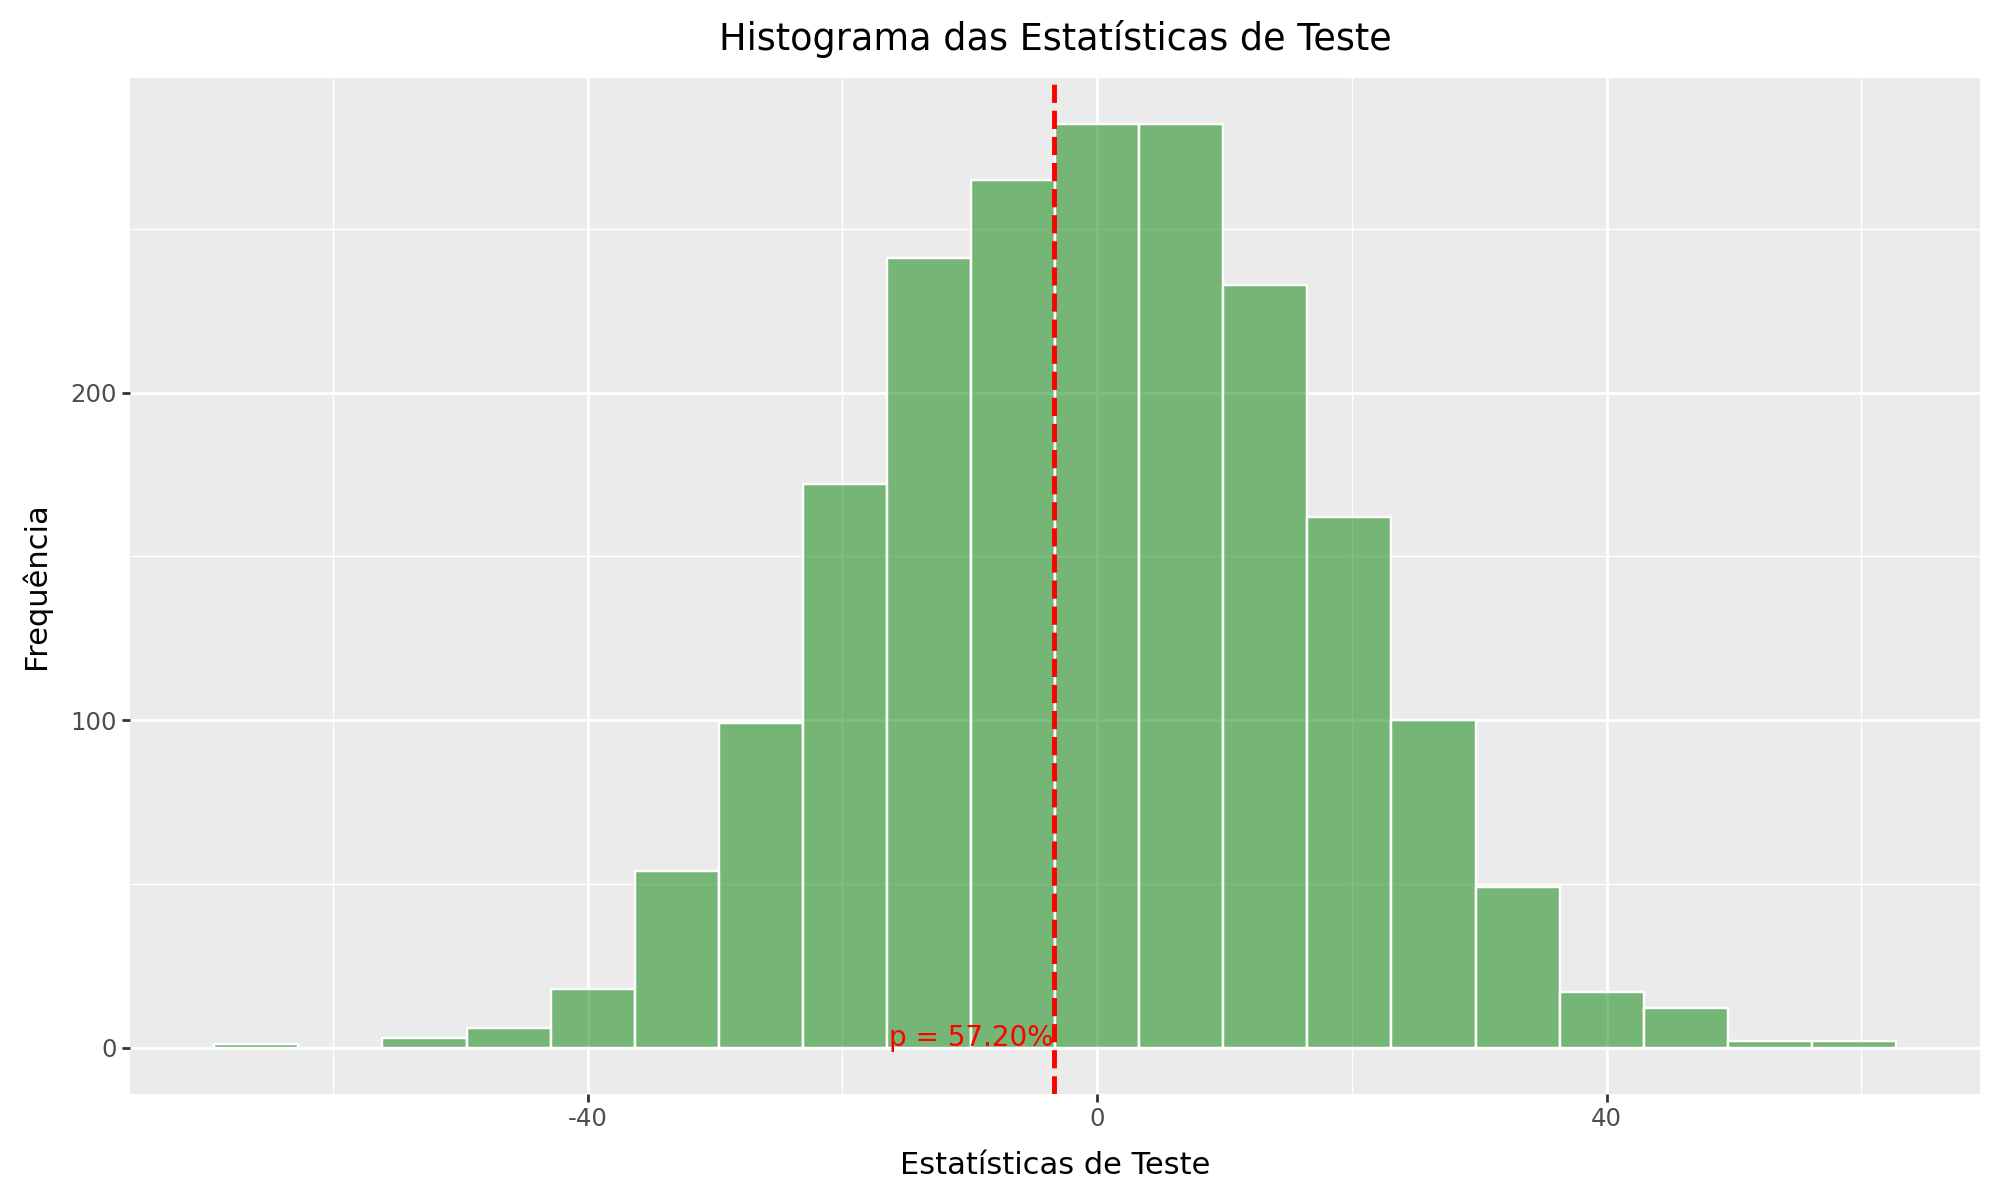

In [88]:
# Plota o histograma de test_stats
plot = (
    ggplot(pd.DataFrame(test_stats, columns=['Test_Stats']), aes(x='Test_Stats')) 
    + geom_histogram(bins=20, color='white', fill='green', alpha=0.5)  # Histogram with custom bins and transparency
    + geom_vline(xintercept=observed_test_statistic, color='red', linetype='dashed', size=1)  # Vertical line for observed statistic
    + labs(
        title='Histograma das Estatísticas de Teste',  # Translated title to Portuguese
        x='Estatísticas de Teste',  # Translated x-axis label
        y='Frequência'  # Translated y-axis label
    )
    + annotate(
        'text',
        x=observed_test_statistic,
        y=max(pd.Series(test_stats).value_counts()),  # Dynamically set y position based on the histogram
        label=f'p = {p_value * 100:.2f}%',
        color='red',
        ha='right',
        size=10
    )
    + theme(figure_size=(10, 6))  # Adjust figure size for better visualization
)

print(plot)


O histograma das estatísticas de teste obtidas a partir do processo de permutação nos permite visualizar a distribuição das diferenças de médias esperadas sob a hipótese nula (ou seja, nenhuma diferença real entre os treinos aeróbicos e anaeróbicos em relação às calorias queimadas).

1. **Distribuição Centrada no Zero**:
   - O histograma mostra uma distribuição simétrica centrada em torno de zero, indicando que, sob a hipótese nula, não há diferença significativa entre os dois tipos de treino.

2. **Posição do Valor Observado**:
   - A linha vermelha pontilhada representa a estatística de teste observada (diferença média entre treinos aeróbicos e anaeróbicos). A posição da linha dentro da distribuição sugere que a estatística observada não está em uma região extrema.

3. **p-Valor**:
   - O p-valor calculado (57,2%) é maior que o nível de significância comumente usado (e.g., 5%). Isso indica que não há evidência suficiente para rejeitar a hipótese nula.

Com base no teste de permutação, concluímos que não há diferença estatisticamente significativa nas calorias queimadas entre os treinos aeróbicos e anaeróbicos. Assim, fatores adicionais, como intensidade e duração do treino, podem desempenhar um papel mais importante no gasto calórico do que o tipo de treino em si.

## Conclusão: Qual tipo de exercício é mais eficaz em queimar calorias?

A análise exploratória e o teste de hipóteses convergem para o mesmo resultado: **não há evidência de diferença significativa no gasto calórico médio entre treinos aeróbicos e anaeróbicos**. As distribuições de calorias queimadas são amplamente sobrepostas, com padrões consistentes que reforçam a semelhança entre os dois tipos de treino.

**Principais Conclusões:**

1. **Distribuição Similar nas Calorias Queimadas**:
   - Ambos os tipos de treino possuem picos de densidade próximos a **900 calorias** e intervalos que variam de **500 a 1750 calorias**.
   - A distribuição de calorias queimadas é simétrica para ambos, com caudas longas que indicam sessões extremas, mas sem impacto relevante nas tendências centrais.

2. **Teste de Permutação**:
   - O histograma das estatísticas de teste confirma que as diferenças médias simuladas sob a hipótese nula estão centradas em **zero**, sugerindo ausência de diferença real entre os treinos.
   - O **p-valor de 57,2%** (bem acima do nível de significância de 5%) indica que não há suporte estatístico para rejeitar a hipótese nula.

**Conclusão Final**:
Esses resultados mostram que o tipo de treino (aeróbico ou anaeróbico) não parece ser um fator determinante para o gasto calórico. A alta semelhança nas distribuições e a ausência de diferenças estatisticamente significativas sugerem que fatores como **intensidade**, **duração** e características individuais têm um impacto mais relevante no gasto energético do que o tipo de treino em si.


# O IMC influencia a escolha do tipo de treino?

Nesta análise, nosso objetivo é responder à pergunta: **O IMC influencia a escolha do tipo de treino?** Compreender a relação entre o Índice de Massa Corporal (IMC) e a preferência por tipos de treino pode fornecer insights sobre como os indivíduos adaptam suas rotinas de exercícios com base em sua composição corporal, o que pode ter implicações para programas de fitness personalizados.

Para investigar essa questão, analisaremos a distribuição do IMC entre os diferentes tipos de treino. Começaremos com visualizações para comparar as distribuições de IMC por categoria de treino, permitindo identificar tendências ou diferenças aparentes. Em seguida, realizaremos um teste de hipótese para avaliar estatisticamente se há uma diferença significativa no IMC entre esses grupos.

A abordagem inclui:
- **Visualização da Distribuição**: Utilização de boxplots e gráficos de densidade para comparar visualmente o IMC entre os tipos de treino.
- **Teste de Hipótese**: Realização de testes estatísticos para determinar se as diferenças observadas no IMC são significativas.
- **Análise do Tamanho do Efeito**: Caso as diferenças no IMC sejam significativas, calcularemos o tamanho do efeito para avaliar a relevância prática dessas diferenças.

Essa análise fornecerá, ao final, uma conclusão baseada em dados sobre a influência do IMC na preferência por tipos de treino, ajudando a esclarecer padrões existentes entre os membros da academia.

## Exploração dos Dados

### Visualização da Distribuição

C:\Users\raiss\AppData\Local\Temp\ipykernel_912\2454195463.py:13: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


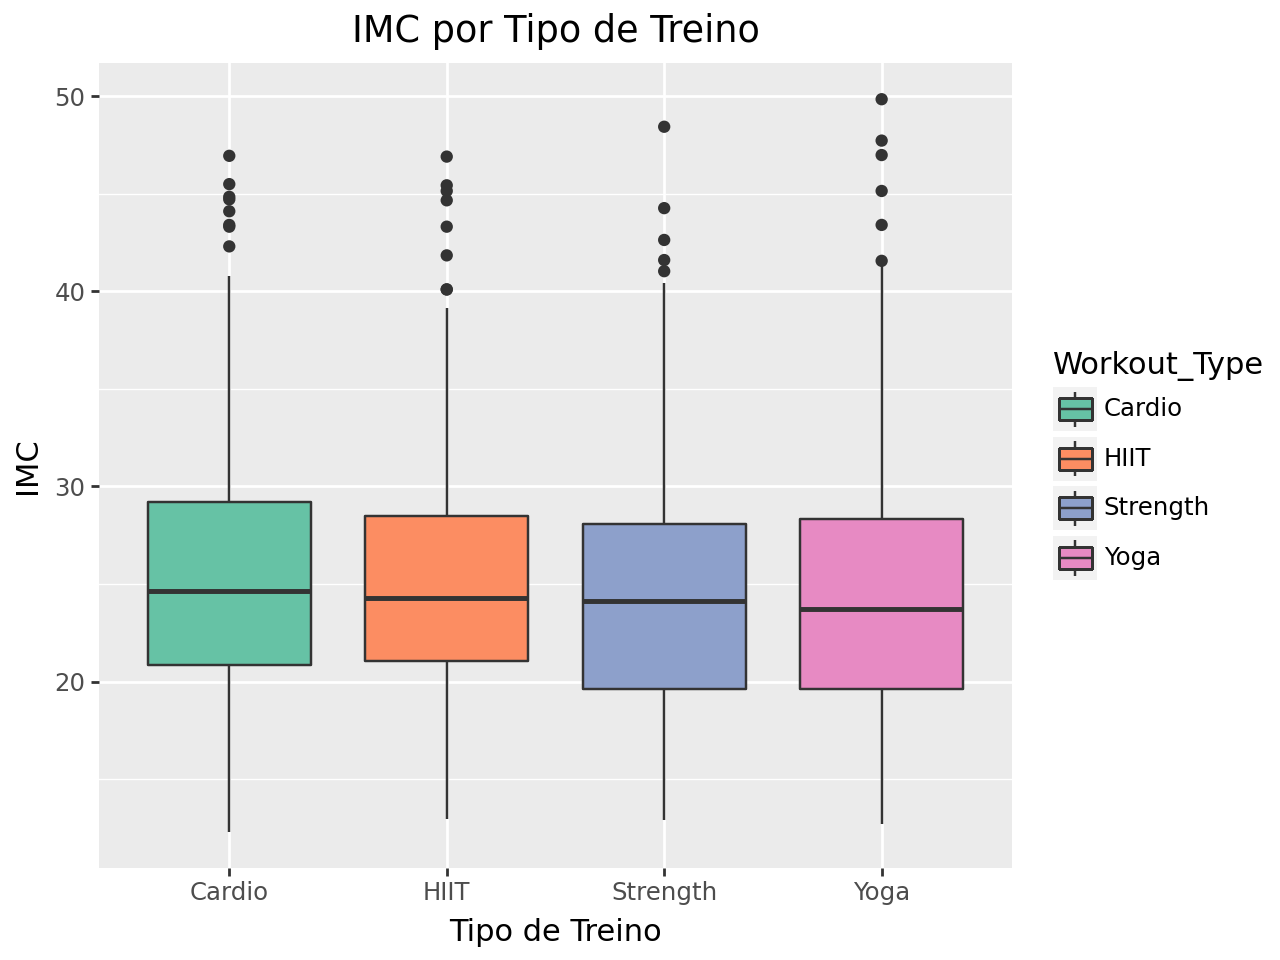

In [89]:
# Visualize BMI distribution by workout type with colors
plot_bmi_workout_type = (
    ggplot(df_gym, aes(x="Workout_Type", y="BMI", fill="Workout_Type"))  # Add fill aesthetic for colors
    + geom_boxplot()  # Use boxplot to show BMI variation across workout types
    + labs(
        title="IMC por Tipo de Treino",  
        x="Tipo de Treino",  
        y="IMC"  
    )
    + scale_fill_brewer(type="qual", palette="Set2")  # Use a qualitative palette for workout types
)

print(plot_bmi_workout_type)


C:\Users\raiss\AppData\Local\Temp\ipykernel_912\1834795162.py:13: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


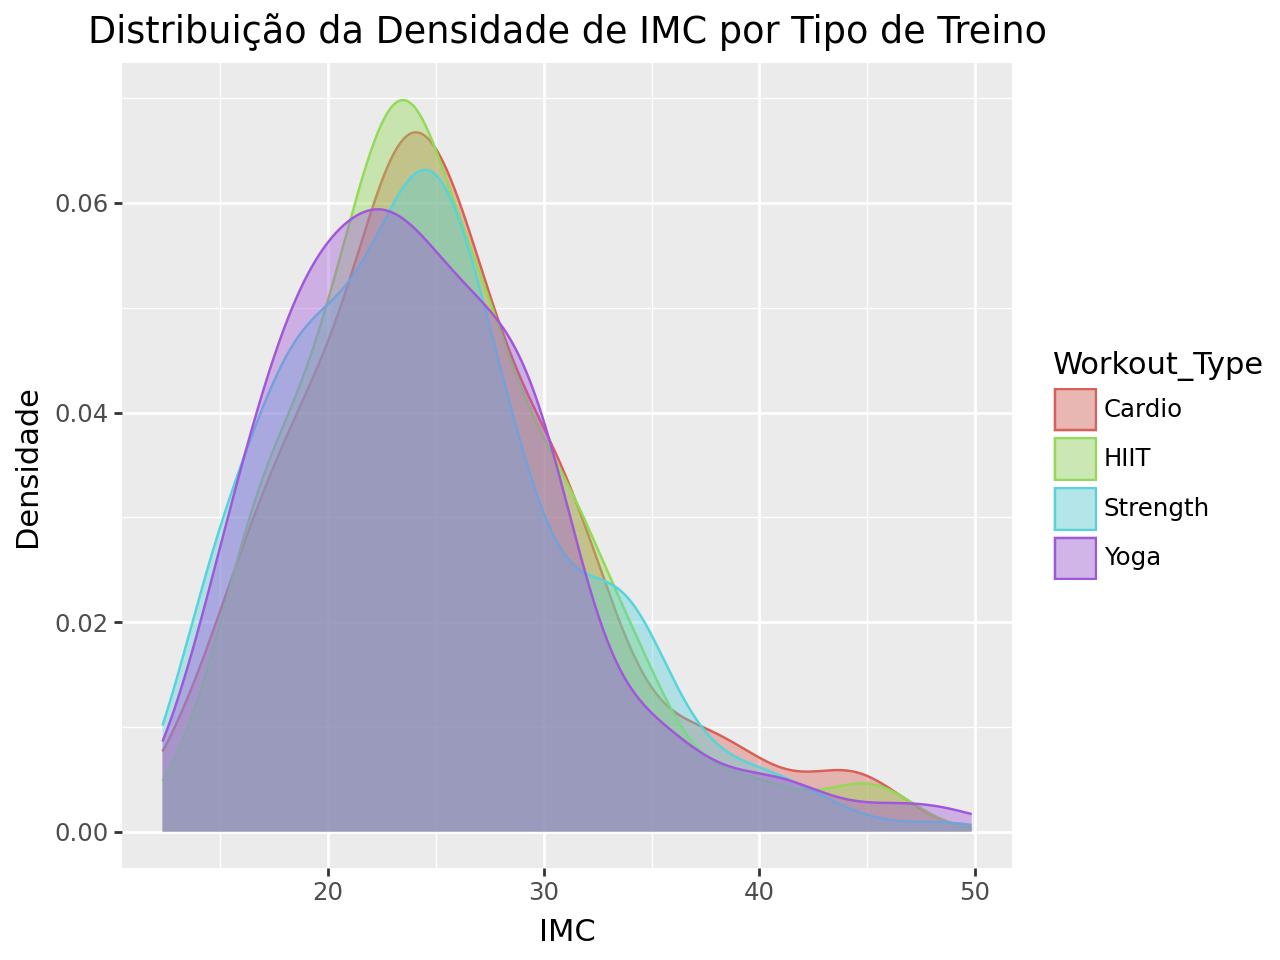

In [90]:
# Density plot for BMI by Workout_Type
plot_bmi_density = (
    ggplot(df_gym, aes(x="BMI", color="Workout_Type", fill="Workout_Type")) 
    + geom_density(alpha=0.4)  # Add transparency for overlapping densities
    + labs(
        title="Distribuição da Densidade de IMC por Tipo de Treino",  
        x="IMC",  
        y="Densidade" 
    )
    + theme(legend_position="right")  # Keep the legend for this plot
)

print(plot_bmi_density)


O boxplot e o gráfico de densidade fornecem insights sobre a distribuição do IMC entre os diferentes tipos de treino. Algumas observações importantes podem ser destacadas:

1. **Ampla Variedade de IMC Entre os Tipos de Treino**: Cada tipo de treino conta com participantes de uma ampla faixa de IMC, indicando que pessoas com composições corporais variadas praticam todos os tipos de exercícios. Essa diversidade desafia a suposição de que certos tipos de treino atraem indivíduos dentro de uma faixa específica de IMC.

2. **Medianas de IMC Semelhantes**: As medianas de IMC parecem consistentes em todos os tipos de treino, sugerindo que, em média, o IMC pode não ser um fator significativo na escolha do tipo de treino. Essa observação levanta uma questão interessante sobre se a escolha do treino é mais influenciada por outros fatores (como objetivos fitness, preferências ou nível de experiência) do que pelo IMC.

3. **Diferenças na Variabilidade (IQR)**: Apesar das medianas semelhantes, a amplitude interquartil (IQR) varia entre os tipos de treino:
   - **HIIT e Cardio** apresentam IQRs mais estreitos, indicando que esses treinos tendem a atrair indivíduos dentro de uma faixa mais específica de IMC. Isso pode implicar que HIIT e Cardio sejam preferidos por pessoas com composições corporais ou objetivos fitness mais semelhantes.
   - **Strength e Yoga** apresentam IQRs mais amplos, sugerindo que atraem uma maior diversidade de IMCs. Essa diversidade pode refletir a adaptabilidade desses tipos de treino, nos quais tanto indivíduos com IMC baixo quanto alto podem participar confortavelmente.

4. **Outliers**: Todos os tipos de treino mostram alguns outliers, particularmente em valores mais altos de IMC, sugerindo que, embora haja diversidade, indivíduos com IMCs muito altos podem ser menos frequentes em cada grupo. No entanto, a presença de outliers em todos os tipos de treino destaca que IMCs elevados não excluem as pessoas de escolherem qualquer tipo específico de exercício.

Essas observações fornecem uma base para investigações adicionais. O próximo passo seria realizar testes estatísticos para determinar se as diferenças aparentes nas distribuições de IMC entre os tipos de treino são estatisticamente significativas. Essa abordagem ajudará a esclarecer se o IMC tem um impacto significativo na escolha do tipo de treino ou se as semelhanças observadas são fruto de variações aleatórias na amostra.

### Teste de Hipotese

Para nosso teste de hipótese, primeiro devemos definir nossas hipóteses:

#### 1. Hipóteses

- **Hipótese Nula (H0)**: Não há diferença significativa no IMC entre os tipos de treino (Cardio, HIIT, Strength, Yoga).
- **Hipótese Alternativa (H1)**: Existe uma diferença significativa no IMC entre pelo menos um par de tipos de treino.

Para testar nossas hipóteses, utilizaremos o teste ANOVA:

#### 2. Explicação do ANOVA

**Análise de Variância (ANOVA)** é um método estatístico usado para comparar as médias de três ou mais grupos independentes, a fim de determinar se há diferenças estatisticamente significativas entre eles. Em outras palavras, o ANOVA nos ajuda a avaliar se a variação de uma característica específica (neste caso, IMC) entre múltiplos grupos (tipos de treino) é devido ao acaso ou se representa uma diferença verdadeira entre os grupos. ANOVA foi introduzido por Sir Ronald A. Fisher em 1950 (FISHER, Ronald Aylmer. *Statistical methods for research workers. 1950*).

**Por que ANOVA?**  
O ANOVA é ideal para esta situação porque:
1. Temos mais de dois grupos (quatro tipos de treino), e o ANOVA nos permite comparar vários grupos em um único teste.
2. Diferentemente de múltiplos testes t, que aumentariam o risco de erro Tipo I (falsos positivos), o ANOVA mantém uma única taxa de erro geral, tornando-o um teste mais confiável para comparações entre grupos.

#### 3. Suposições do ANOVA

Antes de realizar o teste ANOVA, é essencial verificar se os dados atendem às suposições necessárias. As principais suposições do ANOVA incluem:

- **Independência**: Cada observação deve ser independente das demais. Essa suposição geralmente é atendida se os dados foram coletados de forma independente.
- **Normalidade**: Os dados de IMC dentro de cada tipo de treino devem ter uma distribuição aproximadamente normal. Avaliaremos isso visualmente utilizando histogramas e gráficos quantil-quantil (Q-Q).
- **Homogeneidade das variâncias**: As variâncias do IMC entre os tipos de treino devem ser aproximadamente iguais. Para avaliar isso, utilizaremos o teste de Levene para homogeneidade das variâncias.

Agora, vamos prosseguir com os testes de normalidade e homogeneidade das variâncias.

#### Teste de Normalidade

C:\Users\raiss\AppData\Local\Temp\ipykernel_912\2304793912.py:44: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


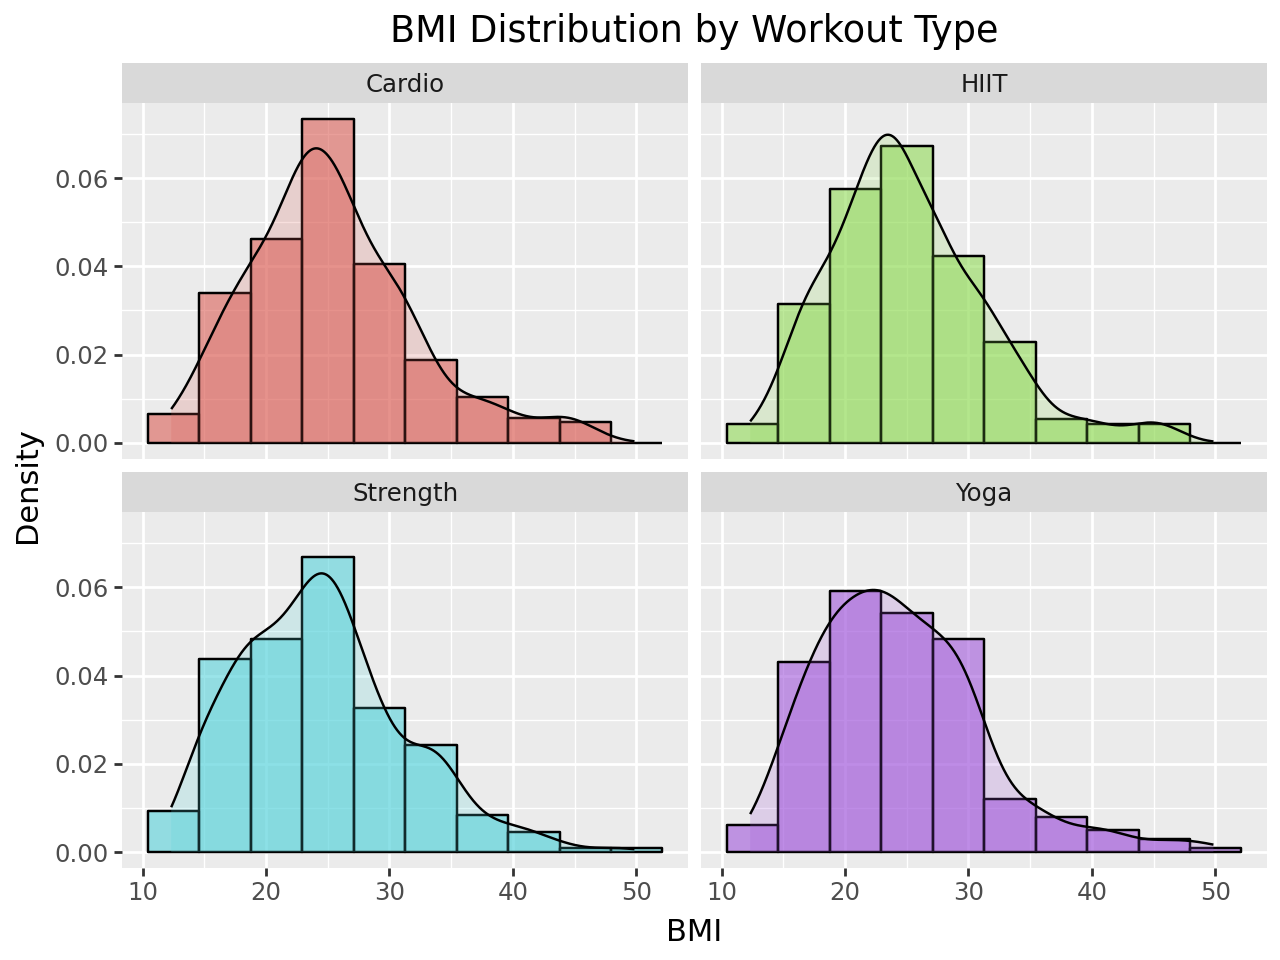

C:\Users\raiss\AppData\Local\Temp\ipykernel_912\2304793912.py:45: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


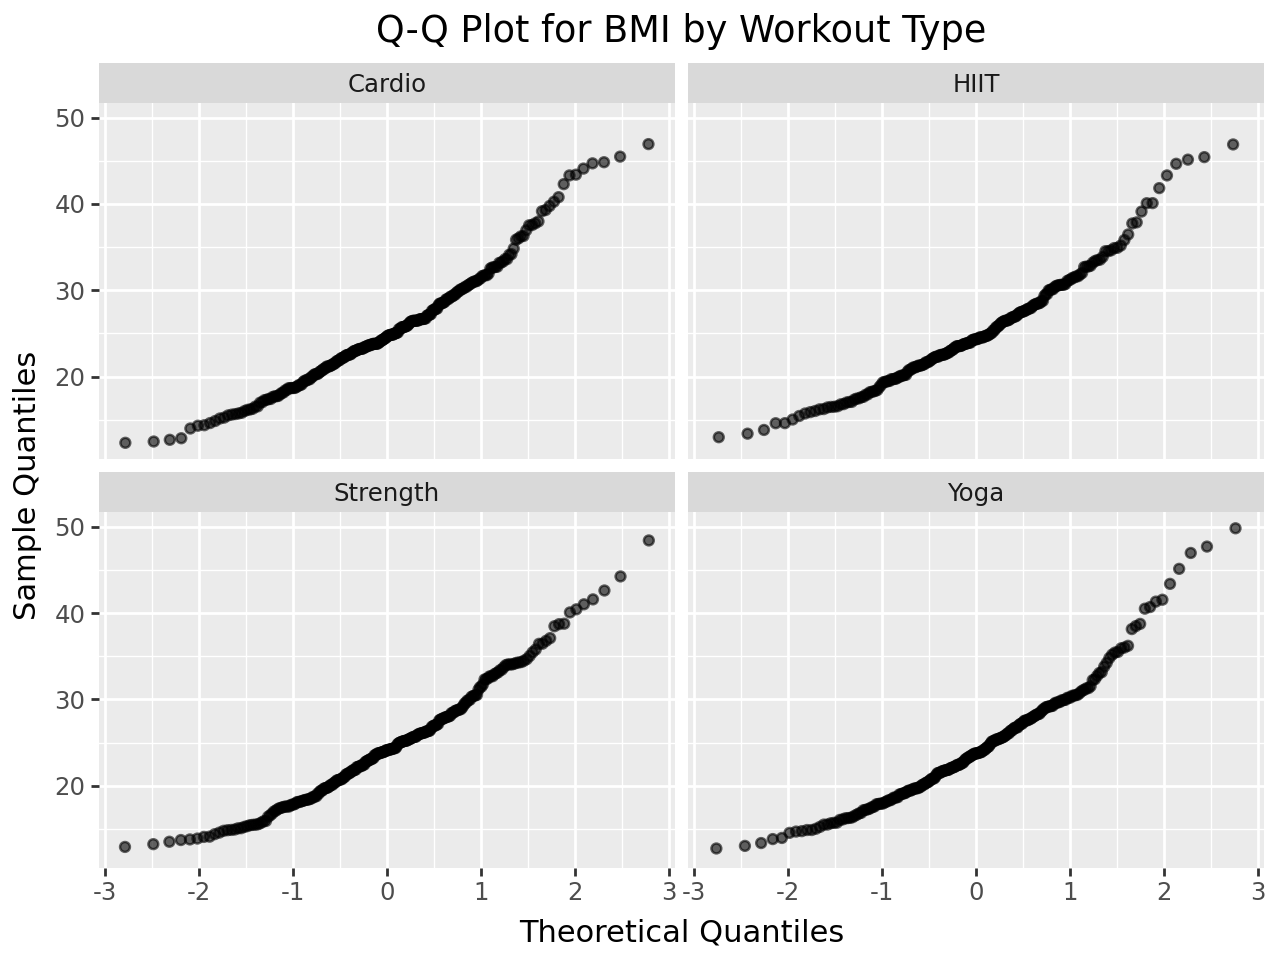

In [91]:
# Filter relevant columns for analysis
df_bmi = df_gym[["BMI", "Workout_Type"]]

# Histogram with KDE for BMI by Workout Type using facets
plot_histogram_kde = (
    ggplot(df_bmi, aes(x="BMI", fill="Workout_Type"))
    + geom_histogram(aes(y="..density.."), bins=10, alpha=0.6, color="black")
    + geom_density(alpha=0.2)
    + facet_wrap("~Workout_Type")
    + labs(
        title="BMI Distribution by Workout Type",
        x="BMI",
        y="Density"
    )
    + theme(legend_position="none")
)

# Calculate theoretical and sample quantiles for each workout type
qq_data = pd.DataFrame()

for workout_type in df_bmi["Workout_Type"].unique():
    data = df_bmi[df_bmi["Workout_Type"] == workout_type]["BMI"]
    (osm, osr), (slope, intercept, _) = stats.probplot(data, dist="norm", fit=True)
    qq_df = pd.DataFrame({
        "Theoretical Quantiles": osm,
        "Sample Quantiles": osr,
        "Workout_Type": workout_type
    })
    qq_data = pd.concat([qq_data, qq_df])

# Q-Q plot using facets
plot_qq = (
    ggplot(qq_data, aes(x="Theoretical Quantiles", y="Sample Quantiles"))
    + geom_point(alpha=0.6)
    + geom_abline(intercept=0, slope=1, color="red", linetype="dashed")
    + facet_wrap("~Workout_Type")
    + labs(
        title="Q-Q Plot for BMI by Workout Type",
        x="Theoretical Quantiles",
        y="Sample Quantiles"
    )
)

print(plot_histogram_kde)
print(plot_qq)

Os histogramas com curvas de densidade e os gráficos Q-Q fornecem uma verificação visual da suposição de normalidade, mas não são suficientes, por si só, para concluirmos se devemos prosseguir com o teste ANOVA. Vamos interpretar essas visualizações no contexto das suposições:

##### 1. **Normalidade**:
   - Nos histogramas, observamos que a distribuição do IMC dentro de cada tipo de treino se aproxima de uma forma normal, especialmente para **Cardio**, **HIIT** e **Strength**. No entanto, o grupo de **Yoga** parece apresentar uma leve assimetria.
   - Nos gráficos Q-Q, os pontos dos dados de cada tipo de treino seguem razoavelmente bem a linha diagonal, embora existam algumas **deviations nas extremidades**, particularmente no grupo de **Yoga**. Isso sugere que, embora os dados de IMC sejam aproximadamente normais, podem haver pequenas desvios nos valores extremos.
   - De forma geral, a suposição de normalidade parece estar **razoavelmente atendida** para o teste ANOVA, já que desvios leves são frequentemente aceitáveis em tamanhos de amostra maiores.

##### 2. **Homogeneidade das Variâncias**:
   - Para testar essa suposição de forma quantitativa, devemos realizar o **teste de Levene** (como mencionado anteriormente). A inspeção visual dos boxplots e gráficos de densidade pode fornecer um indício, mas o ideal é confirmar a homogeneidade das variâncias com o teste de Levene para obter resultados estatísticos robustos.

Com esses insights, podemos concluir que a suposição de normalidade está suficientemente satisfeita para prosseguir com o ANOVA, mas precisamos realizar o teste de Levene para validar a homogeneidade das variâncias.

#### Próximo Passo: Teste de Levene para Homogeneidade das Variâncias

Como os gráficos Q-Q e histogramas sugerem que a normalidade está aproximadamente atendida, o próximo passo é realizar o **teste de Levene** para verificar a homogeneidade das variâncias. Se o teste de Levene indicar que as variâncias são iguais entre os tipos de treino (**p-valor > 0,05**), podemos prosseguir com o ANOVA. Caso contrário, devemos considerar alternativas, como o ANOVA de Welch.

1. **Se o p-valor do teste de Levene > 0,05**: Prosseguir com o ANOVA.
2. **Se o p-valor do teste de Levene < 0,05**: Considerar alternativas ao ANOVA, como o ANOVA de Welch, que é mais robusto em relação à heterogeneidade de variâncias.

Esse passo é essencial para garantir a validade dos resultados do teste ANOVA e decidir o método estatístico mais apropriado para a análise.

In [92]:
# Levene's test for homogeneity of variances
levene_stat, levene_p = stats.levene(
    df_bmi[df_bmi["Workout_Type"] == "Cardio"]["BMI"],  # BMI for Cardio
    df_bmi[df_bmi["Workout_Type"] == "HIIT"]["BMI"],  # BMI for HIIT
    df_bmi[df_bmi["Workout_Type"] == "Strength"]["BMI"],  # BMI for Strength
    df_bmi[df_bmi["Workout_Type"] == "Yoga"]["BMI"]  # BMI for Yoga
)

# Print Levene's test results
print(f"Teste de Levene para homogeneidade de variâncias: Estatística = {levene_stat:.2f}, p-valor = {levene_p:.4f}")

# Interpretation based on p-value
if levene_p > 0.05:
    print("As variâncias são iguais entre os tipos de treino, podemos prosseguir com a ANOVA.")
else:
    print("As variâncias não são iguais, devemos considerar a ANOVA de Welch.")


Teste de Levene para homogeneidade de variâncias: Estatística = 0.24, p-valor = 0.8675
As variâncias são iguais entre os tipos de treino, podemos prosseguir com a ANOVA.


Como as variâncias são iguais entre os tipos de treino, podemos prosseguir com o teste ANOVA para determinar se existe uma diferença estatisticamente significativa no IMC entre os diferentes tipos de treino. Isso nos permitirá avaliar, com base em evidências estatísticas, se o tipo de treino influencia significativamente o IMC dos participantes.

In [93]:
# Perform ANOVA test
# Hipótese Nula (H0): Não há diferença significativa no IMC entre os tipos de treino
# Hipótese Alternativa (H1): Há diferença significativa no IMC entre os tipos de treino
anova_stat, anova_p = stats.f_oneway(
    df_bmi[df_bmi["Workout_Type"] == "Cardio"]["BMI"],  # BMI for Cardio
    df_bmi[df_bmi["Workout_Type"] == "HIIT"]["BMI"],  # BMI for HIIT
    df_bmi[df_bmi["Workout_Type"] == "Strength"]["BMI"],  # BMI for Strength
    df_bmi[df_bmi["Workout_Type"] == "Yoga"]["BMI"]  # BMI for Yoga
)

# Display the ANOVA test results
print(f"Teste ANOVA: Estatística F = {anova_stat:.2f}, p-valor = {anova_p:.4f}")

# Interpret the results based on the p-value
if anova_p < 0.05:
    print("O teste ANOVA é significativo, indicando uma diferença significativa no IMC entre os tipos de treino.")
    print("Prossiga para uma análise post-hoc para determinar quais grupos diferem.")
else:
    print("O teste ANOVA não é significativo, indicando que não há diferença significativa no IMC entre os tipos de treino.")


Teste ANOVA: Estatística F = 1.06, p-valor = 0.3653
O teste ANOVA não é significativo, indicando que não há diferença significativa no IMC entre os tipos de treino.


Como o resultado do nosso teste ANOVA foi **não significativo** (p-valor > 0,05), não rejeitamos a hipótese nula. Isso significa que **não há uma diferença estatisticamente significativa no IMC entre os tipos de treino** neste conjunto de dados. 

Em termos práticos, concluímos que o **IMC não parece influenciar a escolha do tipo de treino** entre os membros da academia analisados. 

Essa conclusão está alinhada com nossa observação a partir dos boxplots, nos quais as medianas do IMC eram semelhantes em todos os tipos de treino. Dado esse resultado, podemos inferir razoavelmente que o IMC, isoladamente, pode não ser um fator determinante para as preferências de tipo de treino.

## Conclusão: O IMC influencia a escolha do tipo de treino?

Nesta análise, investigamos se o **Índice de Massa Corporal (IMC) influencia a escolha do tipo de treino** entre os membros de uma academia, considerando quatro categorias de treino: Cardio, HIIT, Strength e Yoga. Utilizamos o teste de Análise de Variância (ANOVA) para avaliar se havia uma diferença estatisticamente significativa no IMC entre esses tipos de treino.


1. **Análise de Distribuição**: As visualizações iniciais, incluindo boxplots e gráficos de densidade, indicaram **medianas de IMC semelhantes** em todos os tipos de treino, com apenas pequenas variações nos intervalos interquartis (IQR). Isso sugere que participantes com diferentes níveis de IMC participam de todos os tipos de treino, sem uma preferência clara relacionada ao IMC.

![image.png](../../docs/img/bmi_inflence_workout_type_boxplot.png)
![image_2.png](../../docs/img/bmi_inflence_workout_type_histogram.png)

2. **Teste ANOVA**: Os resultados do teste ANOVA **não foram estatisticamente significativos** (p-valor > 0,05), indicando que não rejeitamos a hipótese nula. Este resultado confirma que **não há diferença significativa no IMC entre os tipos de treino**.


Com base no teste ANOVA e na análise visual, concluímos que **o IMC não influencia significativamente a escolha do tipo de treino**. Membros da academia com diferentes níveis de IMC parecem participar dos treinos de Cardio, HIIT, Strength e Yoga sem uma preferência clara baseada apenas no IMC. Isso sugere que outros fatores, como objetivos pessoais de fitness, nível de experiência ou preferências de treino, podem desempenhar um papel mais significativo na determinação do tipo de treino escolhido.

# A frequência semanal de treinos está associada a um maior número de calorias queimadas?

Uma das perguntas mais comuns entre entusiastas de fitness e pesquisadores é se treinar com maior frequência resulta em maior queima de calorias por sessão de treino. Essa questão tem implicações na otimização de planos de treino e na personalização de rotinas fitness para maximizar eficiência e resultados.

#### Pergunta de Pesquisa
**A frequência semanal de treino está associada a uma maior quantidade de calorias queimadas por sessão?**  
Em outras palavras, treinar com maior frequência leva a uma maior queima de calorias por sessão?

#### Plano
Para responder a essa pergunta, a análise seguirá os seguintes passos:

1. **Preparação dos Dados**:
   - Carregar e pré-processar o conjunto de dados para focar nas variáveis relevantes: `Workout_Frequency` e `Calories_Burned`.
   - Verificar valores ausentes, outliers e garantir que os dados estejam limpos para análise.

2. **Análise Exploratória de Dados (EDA)**:
   - Visualizar a relação entre frequência de treino e calorias queimadas utilizando gráficos de dispersão e boxplots.
   - Comparar as distribuições de calorias queimadas entre diferentes frequências de treino.

3. **Análise de Correlação**:
   - Calcular o coeficiente de correlação de Pearson para avaliar a força e a direção da relação entre frequência de treino e queima calórica.

4. **Modelagem Estatística**:
   - Realizar uma análise de regressão linear para determinar se a frequência de treino é um preditor significativo de calorias queimadas por sessão.
   - Quantificar o impacto da frequência de treino na queima calórica.

5. **Conclusão**:
   - Resumir os resultados e fornecer uma resposta baseada em dados à pergunta de pesquisa.

## Analise Exploratoria de Dados

In [94]:
# Focus on relevant columns for analysis
df_analysis = df_gym[['Workout_Frequency (days/week)', 'Calories_Burned']].copy()

In [95]:
# Rename the column for compatibility with the regression formula
df_analysis = df_analysis.rename(columns={"Workout_Frequency (days/week)": "Workout_Frequency"})

In [96]:
# Check for missing values
print("Valores faltantes nas colunas selecionadas:")
print(df_analysis.isnull().sum())

Valores faltantes nas colunas selecionadas:
Workout_Frequency    0
Calories_Burned      0
dtype: int64


In [97]:
# Check summary statistics for the selected columns
print("Resumo estatistico para as colunas selecionadas:")
display(df_analysis.describe())

Resumo estatistico para as colunas selecionadas:


,Workout_Frequency,Calories_Burned
count,973.000000,973.000000
mean,3.321686,905.422405
std,0.913047,272.641516
min,2.000000,303.000000
25%,3.000000,720.000000
50%,3.000000,893.000000
75%,4.000000,1076.000000
max,5.000000,1783.000000


In [98]:
# Check the unique values in Workout_Frequency
print("Valores unicos da Workout_Frequency (frequencia de treino):")
print(df_analysis['Workout_Frequency'].unique())

Valores unicos da Workout_Frequency (frequencia de treino):
[4 3 5 2]


C:\Users\raiss\AppData\Local\Temp\ipykernel_912\1601801864.py:14: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


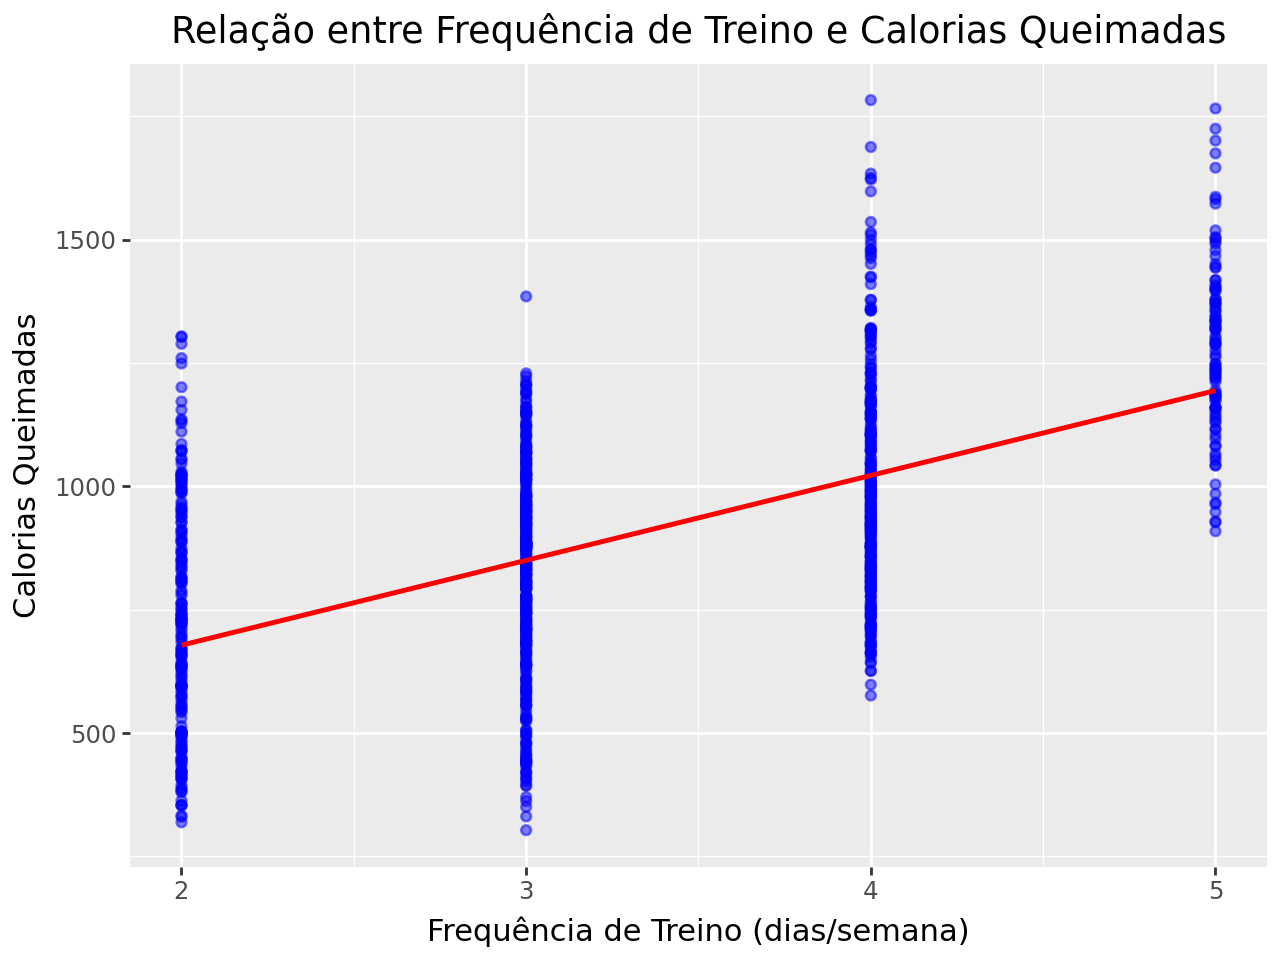

In [99]:
# Analyze if workout frequency is associated with calories burned per session
plot_frequency_calories = (
    ggplot(df_gym, aes(x="Workout_Frequency (days/week)", y="Calories_Burned")) 
    + geom_point(alpha=0.5, color="blue")  # Add points with semi-transparency for better visibility
    + geom_smooth(method="lm", se=False, color="red")  # Add regression line in red
    + labs(
        title="Relação entre Frequência de Treino e Calorias Queimadas", 
        x="Frequência de Treino (dias/semana)", 
        y="Calorias Queimadas" 
    )
    + theme()  # Optional: Customize the theme
)

print(plot_frequency_calories)


O gráfico de dispersão mostra a **relação entre a frequência de treino (dias/semana)** e as **calorias queimadas** por sessão, com uma linha de tendência ajustada.

- Há uma **correlação positiva**: conforme a frequência de treino aumenta, o número de calorias queimadas tende a ser maior.
- A linha de tendência (em vermelho) sugere que, em média, participantes que treinam mais dias por semana queimam mais calorias.
- Apesar da tendência positiva, observa-se uma grande **variabilidade** nos valores de calorias queimadas, com registros dispersos em todas as frequências, indicando que outros fatores (como duração e intensidade do treino) também influenciam o gasto calórico.
- Outliers estão presentes, principalmente em frequências mais baixas, onde algumas sessões resultaram em alto gasto calórico.

O gráfico sugere que treinar com maior frequência está associado a um maior gasto calórico médio, mas a variabilidade reforça que outros elementos devem ser considerados na análise.

C:\Users\raiss\AppData\Local\Temp\ipykernel_912\2112548031.py:12: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


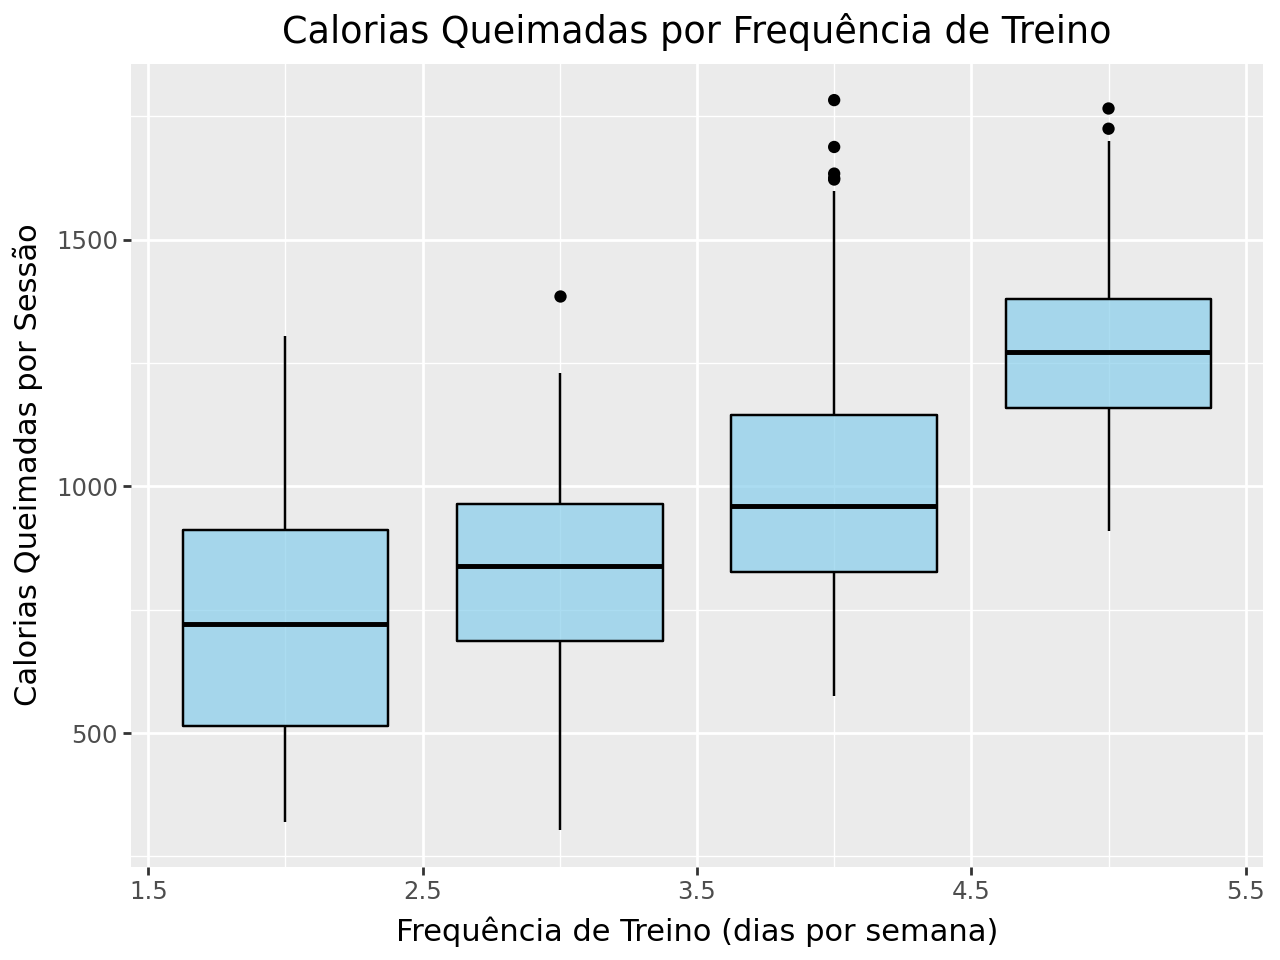

In [100]:
# Box Plot: Distribution of Calories Burned by Workout Frequency
box_plot = (
    ggplot(df_analysis, aes(x='Workout_Frequency', y='Calories_Burned', group='Workout_Frequency')) 
    + geom_boxplot(fill="skyblue", color="black", alpha=0.7)  # Add color and transparency to box plots
    + labs(
        title="Calorias Queimadas por Frequência de Treino",  
        x="Frequência de Treino (dias por semana)",  
        y="Calorias Queimadas por Sessão"  
    )
)

print(box_plot)


O gráfico de boxplot apresentado ilustra a relação entre a **frequência semanal de treino** (dias por semana) e as **calorias queimadas por sessão**. Algumas observações importantes podem ser destacadas:

1. **Tendência Geral de Aumento**:
   - Existe uma **tendência de aumento no gasto calórico médio** conforme a frequência de treino aumenta. Indivíduos que treinam mais frequentemente tendem a queimar mais calorias por sessão.

2. **Medianas Ascendentes**:
   - A **mediana das calorias queimadas** cresce progressivamente com o aumento da frequência de treino, indicando uma associação positiva entre essas variáveis.

3. **Variabilidade nas Calorias Queimadas**:
   - A **variabilidade** (representada pelo tamanho dos boxes e whiskers) também aumenta em frequências mais altas, sugerindo que o gasto calórico é mais disperso entre indivíduos que treinam frequentemente.
   - Existem **outliers** principalmente em frequências mais altas, indicando sessões de treino com calorias excepcionalmente altas.

4. **Faixa de Gasto Calórico**:
   - Para todas as frequências, as calorias queimadas variam amplamente, geralmente entre **500 e 1500 calorias**, reforçando que fatores como intensidade e duração do treino desempenham papéis importantes.

Este gráfico sugere que treinar com maior frequência pode estar associado a um maior gasto calórico por sessão, mas fatores adicionais devem ser considerados para entender a variabilidade observada.

d:\Documentos\feec\analise_visual_em_ciencia_de_dados\ia376m_projeto_final\.venv\lib\site-packages\plotnine\scales\scale.py:130: PlotnineWarning: scale_fill_continuous could not recognise parameter `type`
C:\Users\raiss\AppData\Local\Temp\ipykernel_912\3371659774.py:14: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


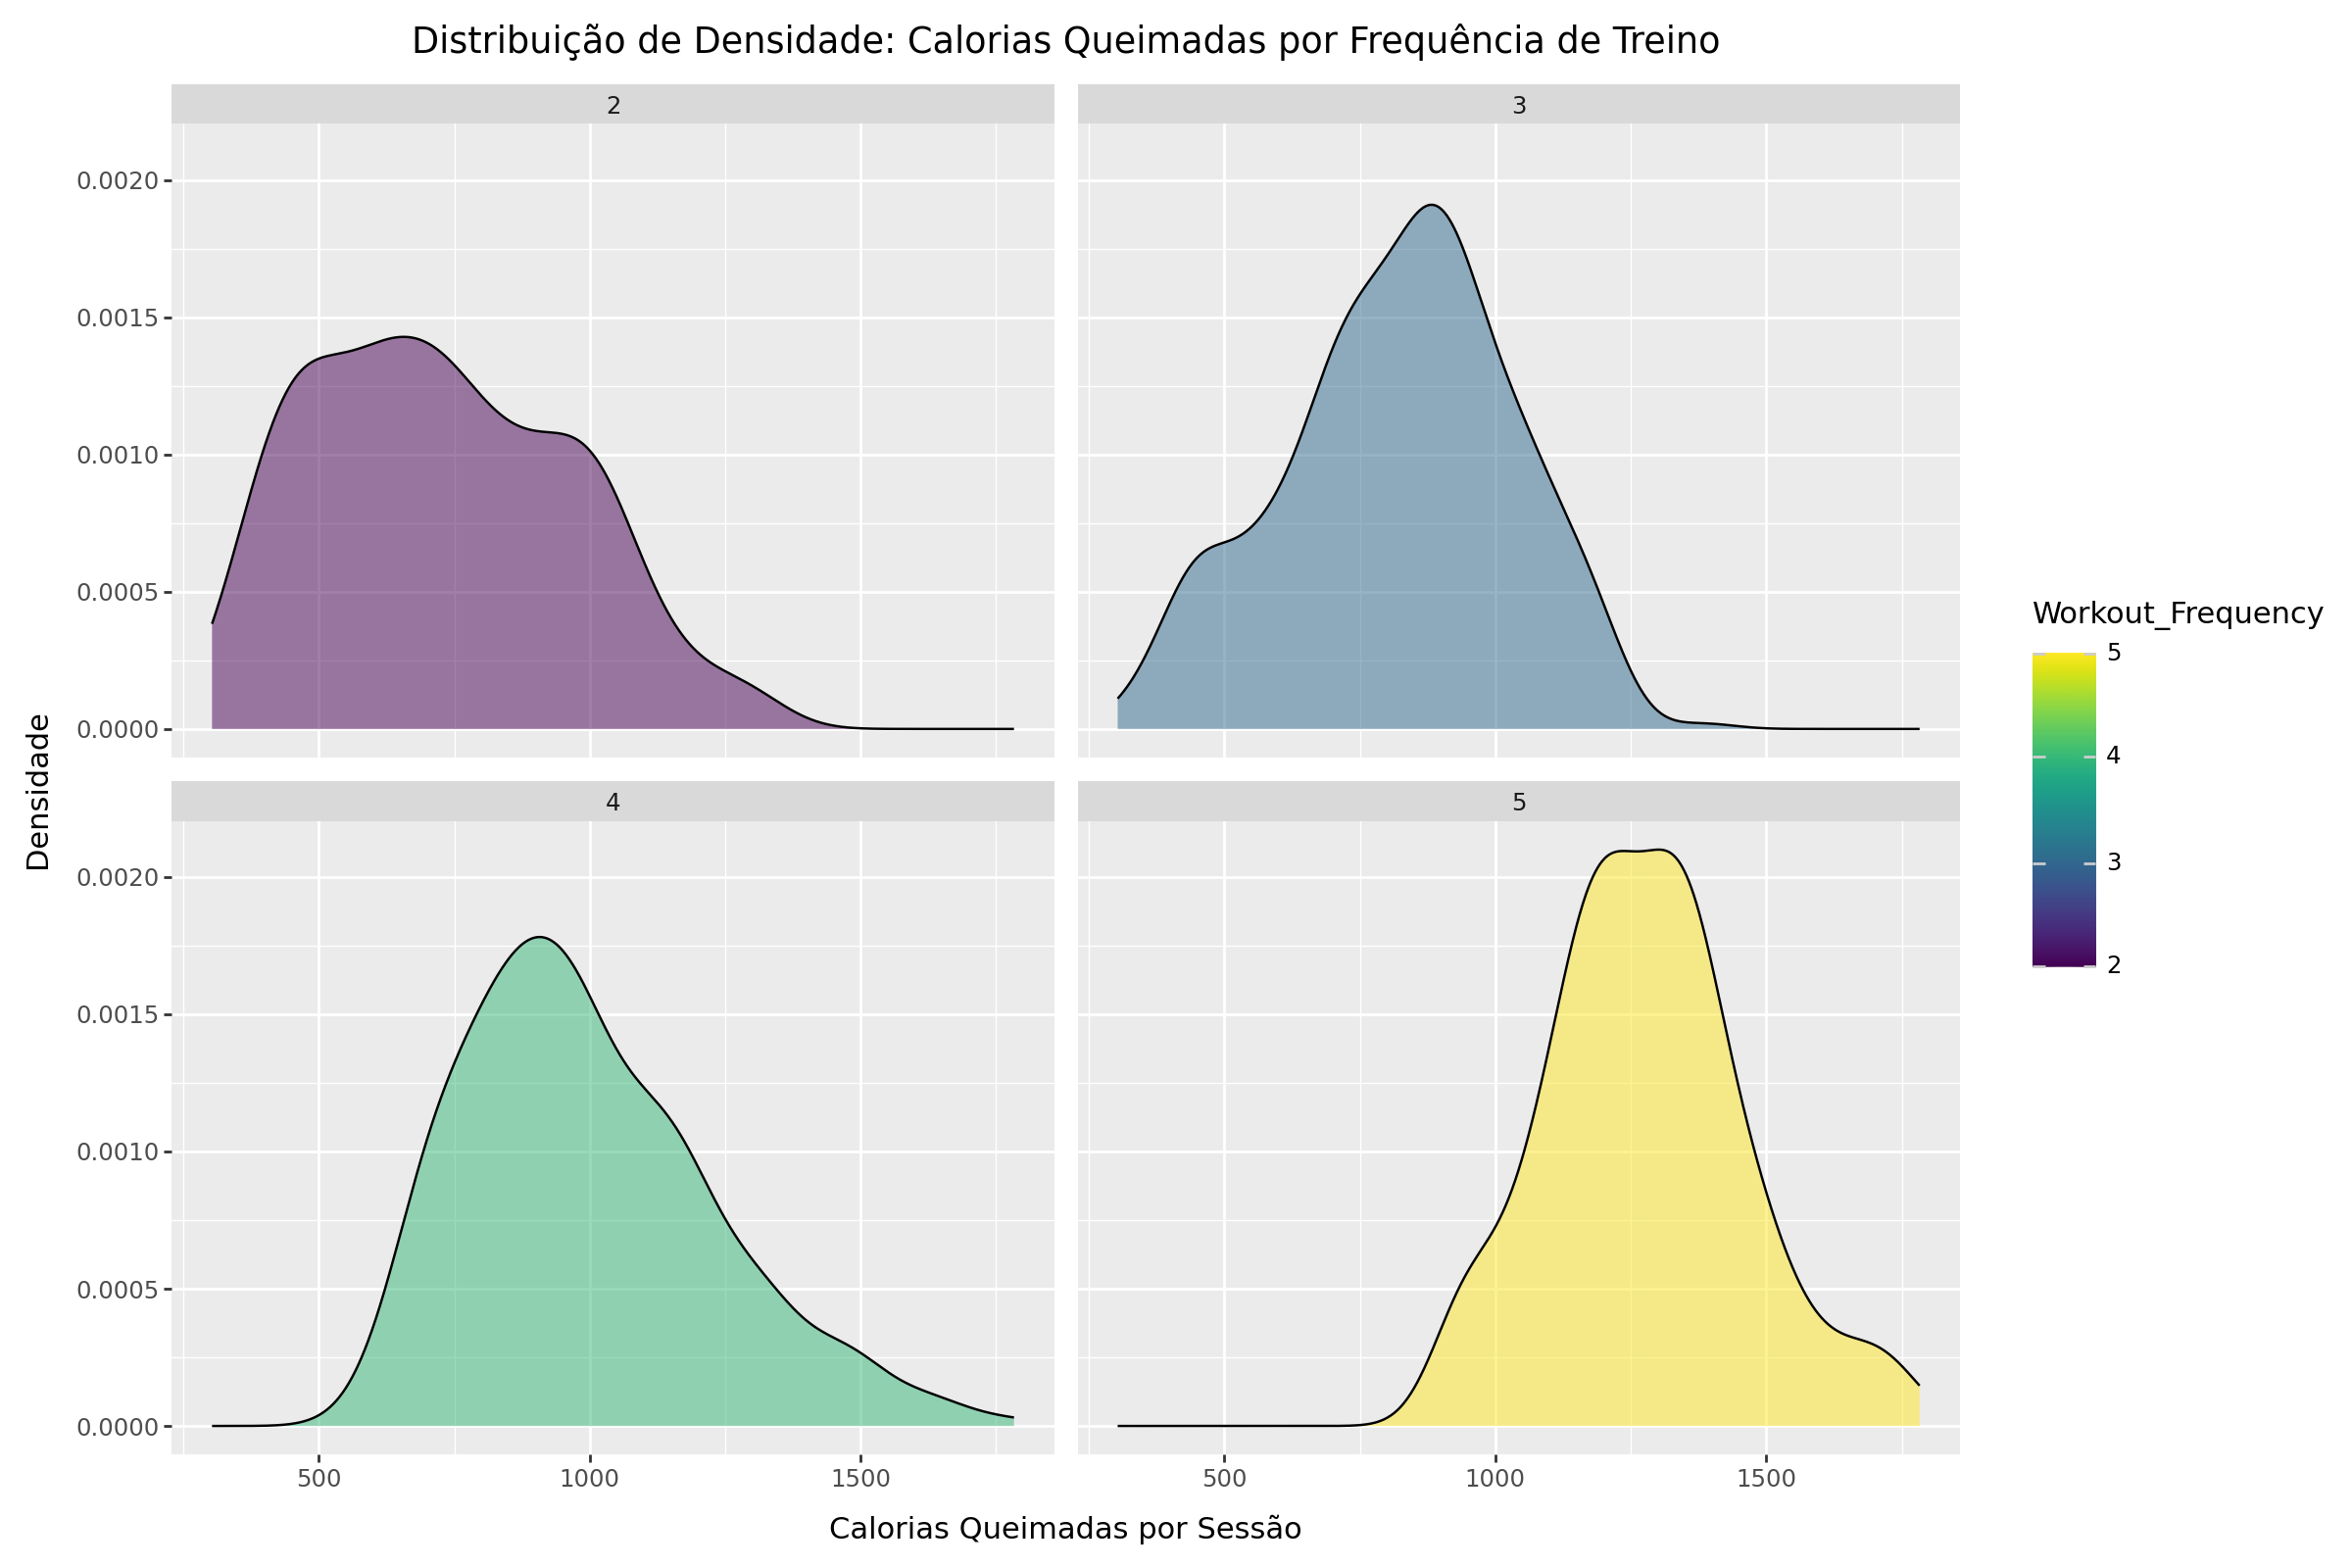

In [101]:
density_plot = (
    ggplot(df_analysis, aes(x='Calories_Burned', fill='Workout_Frequency')) 
    + geom_density(alpha=0.5)  # Add transparency for overlapping densities
    + facet_wrap('~Workout_Frequency')  # Separate plots for each Workout_Frequency
    + labs(
        title="Distribuição de Densidade: Calorias Queimadas por Frequência de Treino", 
        x="Calorias Queimadas por Sessão", 
        y="Densidade"
    )
    + scale_fill_continuous(type='viridis')  # Use a continuous color scale
    + theme(figure_size=(12, 8))  # Increase figure size
)

print(density_plot)


O gráfico apresenta as **distribuições de densidade das calorias queimadas**, separadas pela frequência de treino (em dias por semana). A análise a seguir reflete as observações:

1. **Relação Entre Frequência e Calorias Queimadas**:
   - Existe um padrão claro indicando que **frequências maiores de treino estão associadas a um maior gasto calórico por sessão**.
   - Os picos das distribuições deslocam-se para a direita à medida que a frequência aumenta, indicando que os participantes que treinam mais frequentemente tendem a queimar mais calorias em média.

2. **Maior Consistência em Frequências Altas**:
   - Frequências maiores, como 4 e 5 dias por semana, apresentam distribuições mais concentradas, com menor dispersão ao redor do pico. Isso sugere que indivíduos que treinam mais frequentemente têm resultados mais consistentes em termos de gasto calórico por sessão.
   - A densidade para 5 dias por semana é particularmente pronunciada em torno de valores mais elevados de calorias queimadas.

3. **Frequências Menores Mostram Maior Variabilidade**:
   - Frequências menores, como 2 ou 3 dias por semana, apresentam maior dispersão e variabilidade nos valores de calorias queimadas. Isso pode refletir uma menor consistência no tipo, intensidade ou duração dos treinos realizados por participantes que treinam com menor frequência.

O gráfico reforça a hipótese de que **maior frequência de treino está associada a um maior gasto calórico por sessão**. Além disso, aqueles que treinam mais dias por semana apresentam maior consistência nos resultados. Este padrão sugere que treinar com mais frequência não só aumenta o gasto calórico médio, mas também pode refletir um planejamento de treino mais estruturado e eficaz.

In [102]:
# Summary Statistics by Workout Frequency
print("Estatísticas Resumidas por Frequência de Treino:")
summary_stats = df_analysis.groupby('Workout_Frequency')['Calories_Burned'].describe()

# Display the summary statistics
display(summary_stats)


Estatísticas Resumidas por Frequência de Treino:


,count,mean,std,min,25%,50%,75%,max
Workout_Frequency,,,,,,,,
2,197.0,726.380711,237.349914,319.0,514.0,720.0,911.00,1304.0
3,368.0,821.437500,207.766785,303.0,687.5,839.5,964.25,1385.0
4,306.0,997.640523,231.606127,576.0,827.0,960.0,1143.75,1783.0
5,102.0,1277.568627,182.616761,909.0,1159.0,1271.5,1379.75,1766.0


A análise da relação entre a **frequência semanal de treino** e as **calorias queimadas por sessão** revela uma **associação positiva clara**. Os diferentes gráficos (dispersão, boxplot e densidade) apontam que indivíduos que treinam com maior frequência tendem a queimar mais calorias por sessão, destacando algumas tendências importantes:

1. **Aumento Progressivo no Gasto Calórico**:
   - A mediana e os picos das distribuições de calorias queimadas aumentam conforme a frequência de treino cresce. Essa relação positiva é reforçada pela linha de tendência nos gráficos, indicando que o gasto calórico médio é maior para frequências de 4 a 5 dias por semana.

2. **Consistência em Frequências Maiores**:
   - Indivíduos que treinam com maior frequência mostram resultados mais consistentes em termos de calorias queimadas, com distribuições mais concentradas e variabilidade menor ao redor dos valores médios.

3. **Variabilidade em Frequências Menores**:
   - Frequências menores apresentam maior dispersão nos valores de calorias queimadas, sugerindo que outros fatores, como intensidade, tipo ou duração do treino, podem desempenhar papéis mais relevantes nesses casos.

4. **Presença de Outliers**:
   - Em todas as frequências, há registros de sessões com calorias queimadas muito altas ou muito baixas. Esses outliers destacam a importância de considerar características individuais e fatores externos, como a duração específica de cada treino.

Os resultados sugerem que **treinar com maior frequência não só aumenta o gasto calórico médio por sessão, mas também proporciona resultados mais consistentes**. Isso pode indicar um planejamento de treino mais estruturado e eficaz entre aqueles que treinam mais frequentemente. Contudo, a variabilidade observada em frequências menores reforça a necessidade de considerar fatores adicionais, como intensidade e duração do treino, para compreender completamente o impacto da frequência no gasto calórico.

No entanto, para avaliar formalmente essa observação, prosseguiremos com uma analise de correlação e regressão linear para determinar a força e a direção dessa relação. A análise de correlação permitirá quantificar a associação entre a frequência semanal de treino e as calorias queimadas por sessão, enquanto a regressão linear avaliará se a frequência de treino é um preditor significativo do gasto calórico médio.

## Analise de Correlação

In [103]:
# Calculate Pearson correlation coefficient and p-value
correlation, p_value = stats.pearsonr(df_analysis['Workout_Frequency'], df_analysis['Calories_Burned'])

# Display results
print(f"Coeficiente de Correlação de Pearson (r): {correlation:.2f}")
print(f"Valor-p: {p_value:.4f}")

# Interpretation
if p_value < 0.05:
    print("A correlação é estatisticamente significativa.")
else:
    print("A correlação não é estatisticamente significativa.")


Coeficiente de Correlação de Pearson (r): 0.58
Valor-p: 0.0000
A correlação é estatisticamente significativa.


O coeficiente de correlação de Pearson (r = 0,58 ) indica uma relação positiva moderada entre a frequência de treino e as calorias queimadas por sessão, e o valor de p (p < 0,05 ) confirma que essa correlação é estatisticamente significativa. Portanto, prosseguiremos para a próxima etapa: **Análise de Regressão Linear** para modelar e quantificar essa relação.

### Modelagem Estatistica

A regressão linear é usada para modelar a relação entre uma variável dependente (y) e uma variável independente (x) ajustando uma equação linear aos dados:


y = β_0 + β_1X + ϵ


Onde:
- β_0: Intercepto (calorias queimadas quando a frequência de treino é 0).
- β_1: Inclinação (mudança nas calorias queimadas por dia adicional de treino).
- ϵ: Termo de erro.

Nesta análise:
- y = Calorias Queimadas
- x = Frequência de Treino

In [104]:
# Fit a linear regression model
model = ols('Calories_Burned ~ Workout_Frequency', data=df_analysis).fit()

In [105]:
# Print the regression summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:        Calories_Burned   R-squared:                       0.332
Model:                            OLS   Adj. R-squared:                  0.331
Method:                 Least Squares   F-statistic:                     482.5
Date:                Thu, 28 Nov 2024   Prob (F-statistic):           3.91e-87
Time:                        17:17:36   Log-Likelihood:                -6640.6
No. Observations:                 973   AIC:                         1.329e+04
Df Residuals:                     971   BIC:                         1.329e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           333.9529     26.98

A análise de regressão linear mostra que **a frequência de treino tem um impacto significativo no gasto calórico por sessão**. Aqui estão os principais resultados:

1. **R-quadrado (R² = 0.332)**: Aproximadamente **33.2%** da variabilidade no gasto calórico por sessão pode ser explicada pela frequência de treino. Isso indica que a frequência de treino tem uma contribuição moderada, mas outros fatores também influenciam as calorias queimadas.

2. **Coeficiente da Frequência de Treino (172.04)**: Para cada aumento de 1 dia de treino por semana, as calorias queimadas aumentam em média **172.04 calorias**. Isso sugere uma relação positiva clara entre maior frequência de treino e maior gasto calórico.

3. **P-valor (< 0.05)**: O p-valor para a frequência de treino é muito baixo, o que significa que a relação entre a frequência de treino e as calorias queimadas é **estatisticamente significativa**.

4. **Interpretação do Intercepto (333.95)**: Mesmo sem treino (frequência de treino = 0), o modelo sugere que ainda há **333.95 calorias queimadas**, o que pode indicar um nível basal de gasto calórico.

A análise confirma que **treinar com maior frequência está associado a um maior gasto calórico**. No entanto, o modelo também sugere que **outros fatores**, como a intensidade do treino, podem influenciar o gasto calórico, pois apenas **33.2% da variabilidade** é explicada pela frequência de treino.

C:\Users\raiss\AppData\Local\Temp\ipykernel_912\329094385.py:14: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


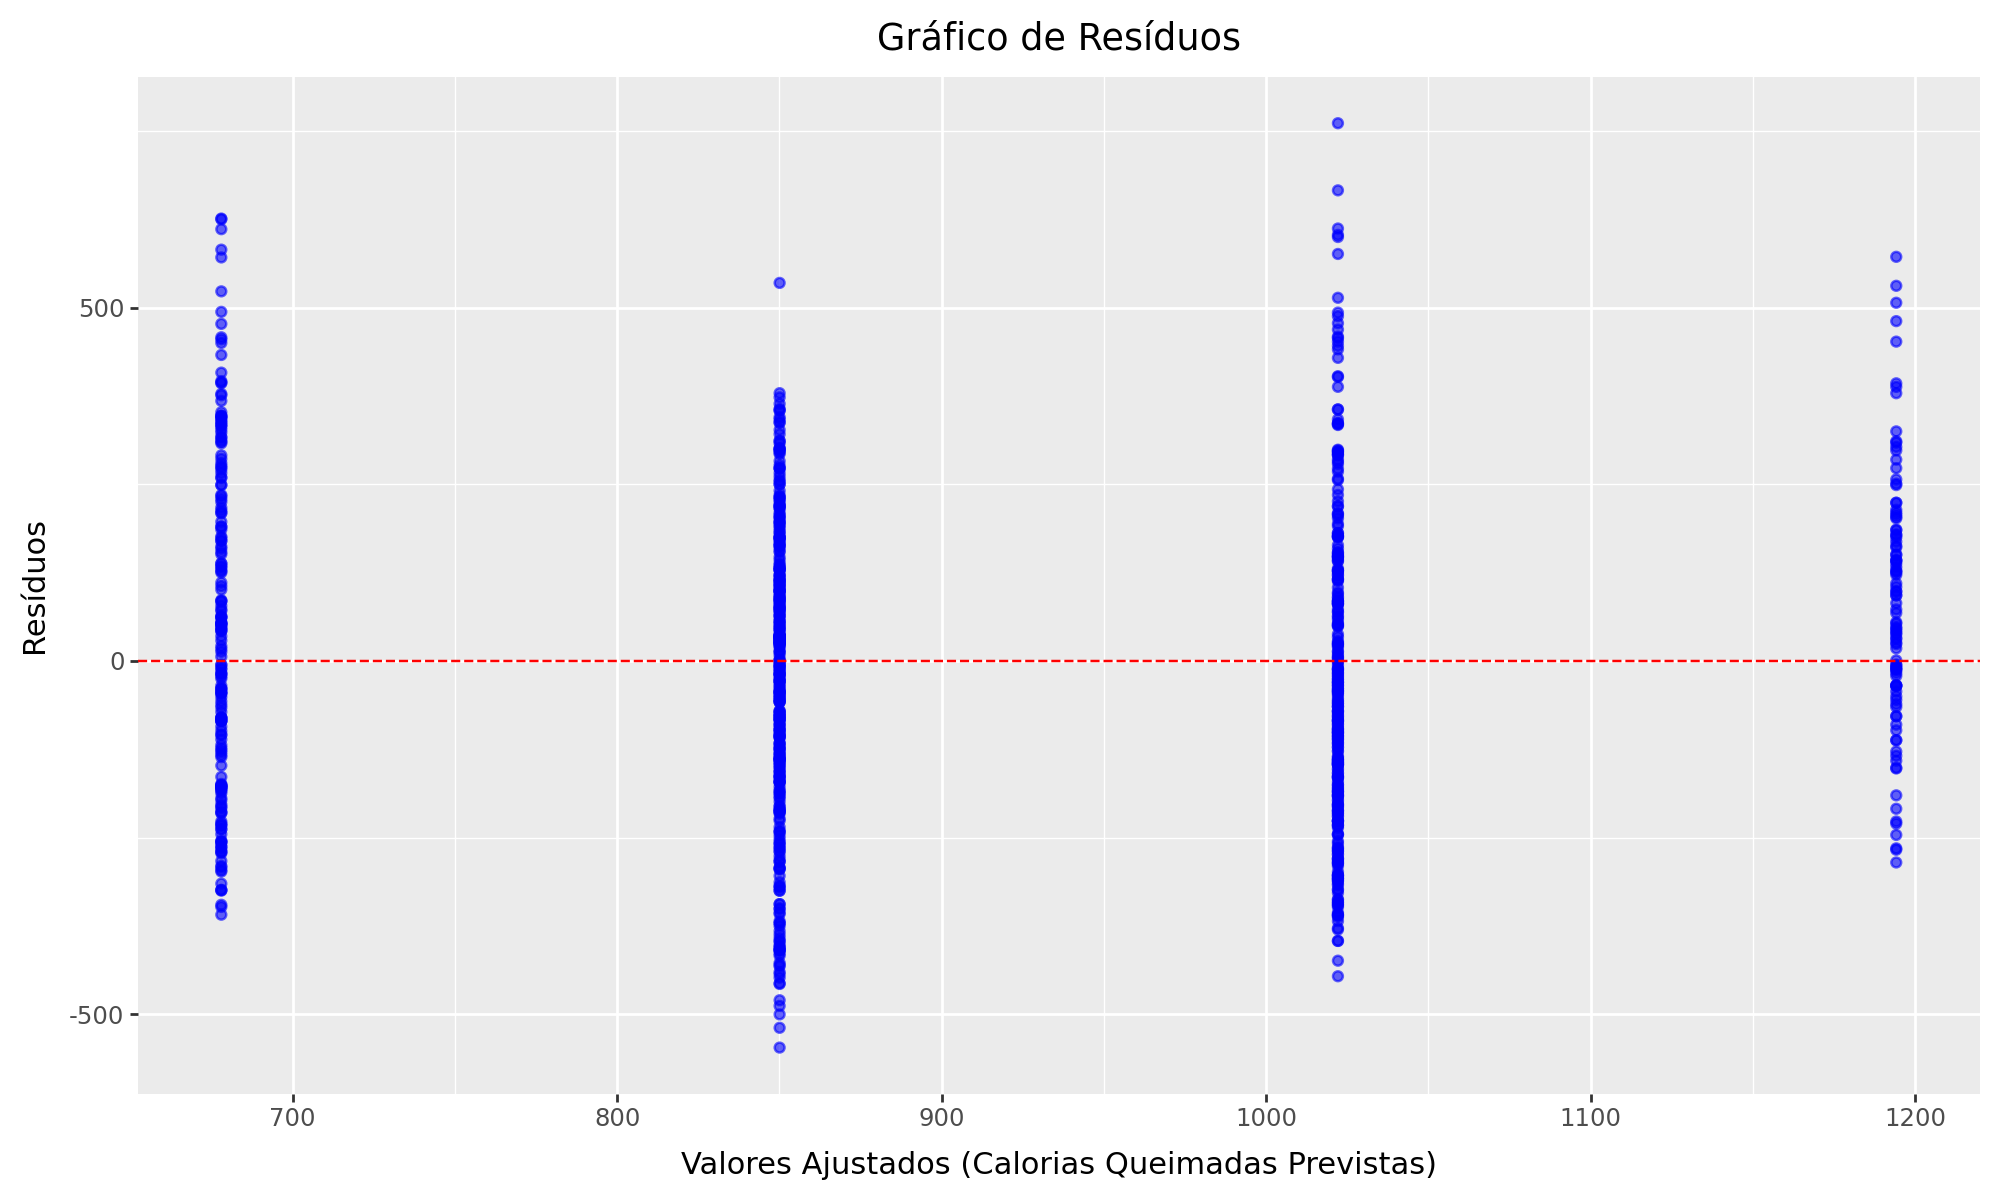

In [106]:
# Plot the residuals to check assumptions of linear regression
residuals_plot = (
    ggplot(df_analysis, aes(x=model.fittedvalues, y=model.resid))  # Fitted values vs residuals
    + geom_point(alpha=0.6, color='blue')  # Add scatter points with transparency
    + geom_hline(yintercept=0, color='red', linetype='dashed')  # Horizontal line at residual = 0
    + labs(
        title="Gráfico de Resíduos",  
        x="Valores Ajustados (Calorias Queimadas Previstas)",  
        y="Resíduos"  
    )
    + theme(figure_size=(10, 6))  # Adjust figure size for better readability
)

print(residuals_plot)


O ajuste do modelo é indicado por um **valor de R-quadrado** de 0,332, o que mostra que aproximadamente 33,2% da variabilidade nas **calorias queimadas** pode ser explicada pela **frequência de treino**. Embora isso sugira uma relação moderada, também destaca que outros fatores não incluídos no modelo podem contribuir para o gasto calórico. O **F-estatístico** do modelo (482,5) e seu p-valor associado (3,91e-87) confirmam que o modelo é estatisticamente significativo, indicando que a frequência de treino é um preditor significativo das calorias queimadas.

Os coeficientes esclarecem ainda mais a relação: o **Intercepto (333,95)** representa as calorias previstas queimadas por alguém que treina zero dias por semana—uma linha de base hipotética para o modelo. O coeficiente para **Frequência de Treino (172,04)** revela que, para cada dia adicional de treino por semana, um indivíduo tende a queimar 172,04 calorias a mais por sessão, em média. O p-valor para esse coeficiente é inferior a 0,001, confirmando sua alta significância estatística.

O gráfico de resíduos mostra que os resíduos estão geralmente distribuídos de forma uniforme em torno de zero, atendendo à suposição de linearidade. Embora alguns outliers estejam presentes, eles não parecem violar significativamente as suposições do modelo. No geral, o modelo demonstra uma relação positiva clara entre a frequência de treino e as calorias queimadas, apoiando a hipótese de que treinar com mais frequência pode levar a um maior gasto calórico, com um aumento estimado de aproximadamente 172 calorias por dia adicional de treino.

Esta análise investigou se a frequência de treino está associada a um maior número de calorias queimadas por sessão.

1. **Análise de Correlação**:
   - Foi encontrada uma correlação positiva moderada estatisticamente significativa (\( r = 0,58, p < 0,05 \)) entre a frequência de treino e as calorias queimadas.

2. **Análise de Regressão**:
   - A regressão linear confirmou que a frequência de treino é um preditor significativo das calorias queimadas (\( p < 0,05 \)).
   - Cada dia adicional de treino está associado a um aumento de aproximadamente **172 calorias queimadas por sessão**.

Os resultados demonstram que aumentar a frequência de treino está positivamente associado ao aumento das calorias queimadas por sessão. Embora outros fatores, como a intensidade ou o tipo de treino, também possam contribuir, essa descoberta destaca a importância da consistência para alcançar objetivos de condicionamento físico.

## Conclusão: A frequência semanal de treinos está associada a um maior número de calorias queimadas?

A análise da relação entre a **frequência de treino** e as **calorias queimadas por sessão** confirmou uma **associação positiva clara** entre as duas variáveis. Gráficos como dispersão, boxplot e densidade mostraram que indivíduos que treinam com maior frequência tendem a queimar mais calorias por sessão, com picos nas distribuições de calorias queimadas observados nas frequências mais altas de treino (4 a 5 dias por semana). Isso foi corroborado pela análise de correlação, que revelou uma correlação moderada e estatisticamente significativa ( r = 0,58, p < 0,05 ).

A análise de regressão linear indicou que a **frequência de treino é um preditor significativo** das calorias queimadas, com cada dia adicional de treino associado a um aumento de **172 calorias queimadas por sessão**. Este achado destaca a importância de **treinar com maior frequência** para maximizar o gasto calórico médio e alcançar resultados mais consistentes. No entanto, a análise também mostrou que a **variabilidade nas calorias queimadas** é maior em frequências menores de treino, sugerindo que outros fatores, como a **intensidade e duração do treino**, também devem ser considerados para compreender totalmente o impacto da frequência no gasto calórico.

Em suma, esses resultados reforçam a ideia de que **a consistência nos treinos**, associada a uma maior frequência semanal, é essencial para otimizar o gasto calórico e atingir os objetivos de condicionamento físico.

# Conclusões Finais

A análise foi conduzida com o objetivo de responder a três questões centrais sobre padrões de exercícios físicos e sua relação com a queima calórica e escolhas de treino. A seguir, apresentamos as respostas integradas para cada uma das perguntas de pesquisa:

---

#### **1. Qual tipo de exercício é mais eficaz em queimar calorias: aeróbico ou anaeróbico?**

Os resultados indicaram que **não há diferença significativa no gasto calórico médio entre treinos aeróbicos e anaeróbicos**. A análise exploratória revelou distribuições amplamente sobrepostas, com picos de densidade próximos a **900 calorias** em ambos os tipos de treino. O teste de permutação reforçou esse achado, apresentando um p-valor de **57,2%**, muito acima do nível de significância de 5%, indicando que não há suporte estatístico para rejeitar a hipótese nula.

**Conclusão:** O tipo de exercício (aeróbico ou anaeróbico) não parece ser o principal fator determinante para o gasto calórico. Outros aspectos, como **intensidade** e **duração do treino**, podem ser mais influentes nesse quesito.

---

#### **2. O IMC influencia a escolha do tipo de treino?**

A relação entre o **Índice de Massa Corporal (IMC)** e a escolha do tipo de treino foi analisada utilizando ANOVA e visualizações como boxplots e gráficos de densidade. As medianas de IMC foram semelhantes entre os tipos de treino (Cardio, HIIT, Strength e Yoga), com pequenas variações nos intervalos interquartis. O teste ANOVA confirmou que **não há diferença estatisticamente significativa** no IMC entre os grupos (p-valor > 0,05).

**Conclusão:** O IMC não influencia significativamente a escolha do tipo de treino. Isso sugere que fatores como **objetivos pessoais**, **preferências individuais** ou **nível de experiência** desempenham um papel mais relevante na escolha do tipo de exercício.

---

#### **3. A frequência semanal de treinos está associada a um maior número de calorias queimadas por sessão?**

A análise revelou uma **associação positiva clara** entre frequência de treino e calorias queimadas por sessão. Gráficos como dispersão, boxplot e densidade demonstraram que participantes que treinam com maior frequência (4 a 5 dias por semana) apresentam maiores gastos calóricos médios por sessão. A análise de correlação identificou uma relação moderada e significativa (r = 0,58, p < 0,05), enquanto a regressão linear indicou que cada dia adicional de treino está associado a um aumento de **172 calorias queimadas por sessão**.

**Conclusão:** Treinar com maior frequência está positivamente associado a um maior gasto calórico por sessão. Além disso, indivíduos que treinam mais frequentemente apresentam resultados mais consistentes, enquanto frequências menores mostram maior variabilidade devido a fatores como **intensidade** e **duração do treino**.

---

### **Conclusões Gerais e Impacto**

Os resultados reforçam a ideia de que **a personalização de rotinas de treino deve considerar múltiplos fatores**, como frequência, intensidade e objetivos individuais, em vez de focar exclusivamente no tipo de treino ou características como IMC. 

- **Para profissionais de saúde e academias**: Essas descobertas podem ajudar na criação de programas de treino mais eficazes e aderentes, baseados na frequência semanal e nas necessidades específicas dos praticantes.
- **Para indivíduos**: A consistência nos treinos (treinar com maior frequência) é um fator essencial para otimizar o gasto calórico e alcançar metas de saúde e condicionamento físico.

Esses insights contribuem para **promover a saúde e o bem-estar**, além de gerar valor prático para o mercado fitness e startups de tecnologia voltadas para personalização de treinos.